In [1]:
# numerical laibary
import numpy as np

# import pandas laibary
import pandas as pd

# plotting laibary
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Regression model
from sklearn.linear_model import LinearRegression

# Regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# import ensmble meethod
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [183]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
# load dataset
ds=pd.read_csv('PP.csv')
ds

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [6]:
# put into datframe
df=pd.DataFrame(ds)
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [7]:
df.head()  #upper top 5 rows

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [8]:
df.head()  #lower bottom 5 rows

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [9]:
df.sample()  #random row

country country_long    name   gppd_idnr  capacity_mw  latitude  \
474     IND        India  METTUR  IND0000265        840.0   11.7696   

     longitude primary_fuel other_fuel1 other_fuel2  ...  \
474    77.8138         Coal         Oil         NaN  ...   

     year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
474                 2019.0                  NaN            5697.399   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
474            5471.328            5239.703            4666.672   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
474             5314.336                  NaN  Central Electricity Authority   

     estimated_generation_gwh  
474                       NaN  

[1 rows x 27 columns]

In [10]:
# check dataset frame
type(df)

pandas.core.frame.DataFrame

Frame into dataframe

In [11]:
# check inforamation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

1. In our dataset we have 907 columns and 27 rows in it.
2. In dataset 15 variable is out of 27 is float type and 12 variable is out of 27 is object type.
3. Null valuesb are present in        latitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,geolocation_source,wepp_id,
    year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016                           generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh.

In [12]:
# check total null in dataset 
df.isnull().sum().sum()

10445

toatl number of null values in dataset is 10445

In [13]:
# check null values in each variable
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are all null values are present in columns, so we drop it-->
1. other_fuel2----->              906
2. other_fuel3----->                907
3. wepp_id----->                  907
4. generation_gwh_2013----->        907
5. generation_gwh_2019----->        907
6. estimated_generation_gwh----->    907

<AxesSubplot:>

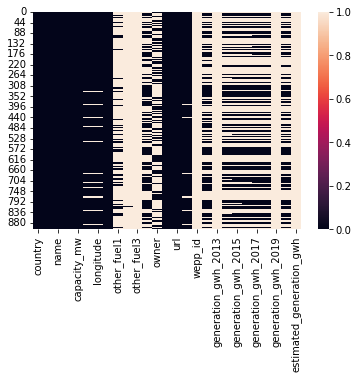

In [14]:
# see null values in plot daigram
sns.heatmap(df.isnull())

### Drop thoes columns where all all rows of columns are null

In [15]:
# drop which columns where all null values are present
df=df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [16]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year  ...                                source  \
0                2011.0  ...  National Renewable Energy Laboratory   
1                   NaN  ...                  Ultratech Cement ltd   
2                   NaN  ...                                   CDM   
3                2004.0  ...         Central Electricity Authority   
4                2015.0  ...         Central Electricity Authority   
..                  ...  ...                                   ...   
902              2016.0  ...         Central Electricity Authority   
903                 NaN  ...   Karnataka Power Corporation Limited   
904                 NaN  ...                                   CDM   
905                 NaN  ...                    Hindustan Zinc ltd   
906                 NaN  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                   NaN   
1                                     WRI                   NaN   
2                                     WRI                   NaN   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                   NaN   
904                                   WRI                   NaN   
905                                   WRI                   NaN   
906                                   WRI                   NaN   

     generation_gwh_2014  g

# Remove unwanted variables from dataset
1. Country-->there is only one country so this is not requried.
2. Country_logo-->Only on ecountry logo so drop it.
3. Source-->not requried.
4. Url-->Not requried.
5. name-->not requried.

In [17]:
# remove unwanted columns like object type ,where no use more
df=df.drop(['country','country_long','url','name','source','owner'],axis=1)

In [18]:
df

gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0    WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1    WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2    WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3    IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4    IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
..          ...          ...       ...        ...          ...         ...   
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                    geolocation_source  \
0                2011.0  National Renewable Energy Laboratory   
1                   NaN                                   WRI   
2                   NaN                                   WRI   
3                2004.0                                   WRI   
4                2015.0                                   WRI   
..                  ...                                   ...   
902              2016.0                                   WRI   
903                 NaN                        Industry About   
904                 NaN                                   WRI   
905                 NaN                                   WRI   
906                 NaN                                   WRI   

     year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                   2019.0           617.789264           843.747000   
4                   2019.0          3035.550000          5916.370000   
..                     ...                  ...                  ...   
902                 2019.0                  NaN             0.994875   
903                    NaN                  NaN                  NaN   
904                    NaN                  NaN                  NaN   
905                    NaN                  NaN                  NaN   
906                    NaN                  NaN                  NaN   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             886.004428           663.774500           626.239128   
4            6243.000000          5385.579736          7279.000000   
..                   ...                  ...                  ...   
902           233.596650           865.400000           686.500000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

            generation_data_source  
0                              NaN  
1                              NaN  
2                              NaN  
3    Central Electricity Authority  
4    Central Electricity Authority  
..                             ...  
902  Central Electricity Authority  
903                            NaN  
904                            NaN  
905                            NaN  
906                            NaN  

[907 rows x 15 columns]

# Separate Both dataset into object and float type daatset

# Float type dataset

In [19]:
df1=df.select_dtypes('float')
df1

capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407              2011.0   
1           98.0   24.7663    74.6090                 NaN   
2           39.2   21.9038    69.3732                 NaN   
3          135.0   23.8712    91.3602              2004.0   
4         1800.0   21.9603    82.4091              2015.0   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568              2016.0   
903          3.0   12.8932    78.1654                 NaN   
904         25.5   15.2758    75.5811                 NaN   
905         80.0   24.3500    73.7477                 NaN   
906         16.5    9.9344    77.4768                 NaN   

     year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                   2019.0           617.789264           843.747000   
4                   2019.0          3035.550000          5916.370000   
..                     ...                  ...                  ...   
902                 2019.0                  NaN             0.994875   
903                    NaN                  NaN                  NaN   
904                    NaN                  NaN                  NaN   
905                    NaN                  NaN                  NaN   
906                    NaN                  NaN                  NaN   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                    NaN                  NaN                  NaN  
1                    NaN                  NaN                  NaN  
2                    NaN                  NaN                  NaN  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903                  NaN                  NaN                  NaN  
904                  NaN                  NaN                  NaN  
905                  NaN                  NaN                  NaN  
906                  NaN                  NaN                  NaN  

[907 rows x 10 columns]

In [20]:
# check null values in float typpe dataset
df1.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [21]:
# First of all remove null values
from sklearn.impute import SimpleImputer

In [22]:
imp=SimpleImputer(strategy='mean')

In [23]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [24]:
df1

capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407         2011.000000   
1           98.0   24.7663    74.6090         1997.091082   
2           39.2   21.9038    69.3732         1997.091082   
3          135.0   23.8712    91.3602         2004.000000   
4         1800.0   21.9603    82.4091         2015.000000   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568         2016.000000   
903          3.0   12.8932    78.1654         1997.091082   
904         25.5   15.2758    75.5811         1997.091082   
905         80.0   24.3500    73.7477         1997.091082   
906         16.5    9.9344    77.4768         1997.091082   

     year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                   2019.0          2431.823590          2428.226946   
1                   2019.0          2431.823590          2428.226946   
2                   2019.0          2431.823590          2428.226946   
3                   2019.0           617.789264           843.747000   
4                   2019.0          3035.550000          5916.370000   
..                     ...                  ...                  ...   
902                 2019.0          2431.823590             0.994875   
903                 2019.0          2431.823590          2428.226946   
904                 2019.0          2431.823590          2428.226946   
905                 2019.0          2431.823590          2428.226946   
906                 2019.0          2431.823590          2428.226946   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            2467.936859          2547.759305          2600.804099  
1            2467.936859          2547.759305          2600.804099  
2            2467.936859          2547.759305          2600.804099  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903          2467.936859          2547.759305          2600.804099  
904          2467.936859          2547.759305          2600.804099  
905          2467.936859          2547.759305          2600.804099  
906          2467.936859          2547.759305          2600.804099  

[907 rows x 10 columns]

In [25]:
df1.isnull().sum().sum()  #check null values after apply impute method

0

No null values are present in float type dataset 

# Comparision in float type dataset variable and target capacity_mw

In [26]:
def numeriacl_plot(df,variable,target='capacity_mw'):
    """A function for plotting the distribution of numerical variables and its effect on capacity_mw"""
        
    fig,ax=plt.subplots(ncols=2 ,figsize=(20,5))
    #boxplot for comparision
    sns.boxplot(x=target ,y=variable ,data=df ,ax=ax[0])
    ax[0].set_title(f"Comparision of {variable} vs {target}")
    
    #distribution plot for variable
    ax[1].set_title(f" Distribution of {variable}")
    ax[1].set_ylabel('Frequency')
    sns.distplot(a = df[variable], ax=ax[1])
    
    plt.show()

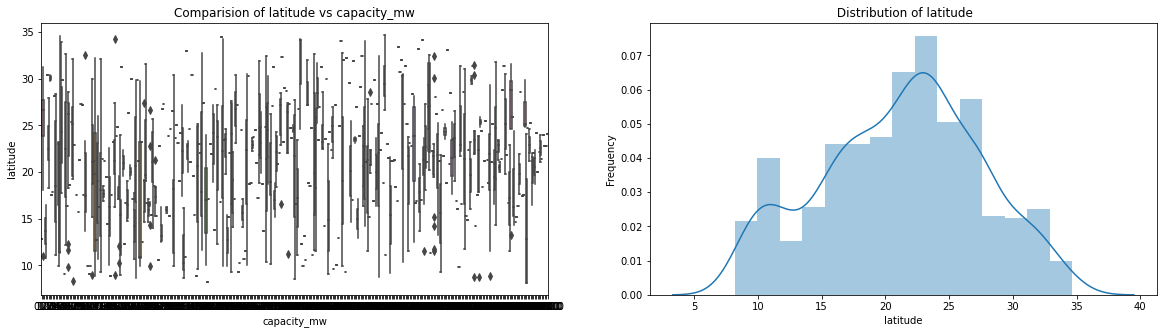

In [27]:
numeriacl_plot(df,variable='latitude')

According to latitude the capacity of power plant is fluctuation.
At 22 to 25 high latitude capacity of power plant is high.

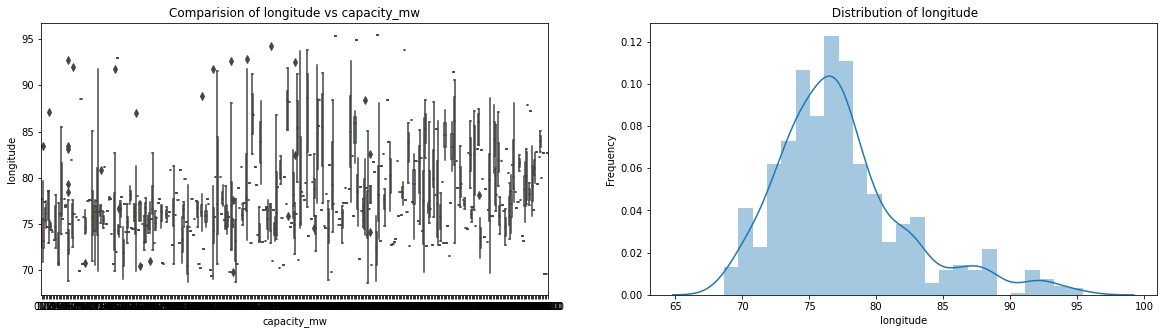

In [28]:
numeriacl_plot(df,variable='longitude')

According to longitude the capacity of power plant is fluctuation. At 75 to 80 high longitude capacity of power plant is high.

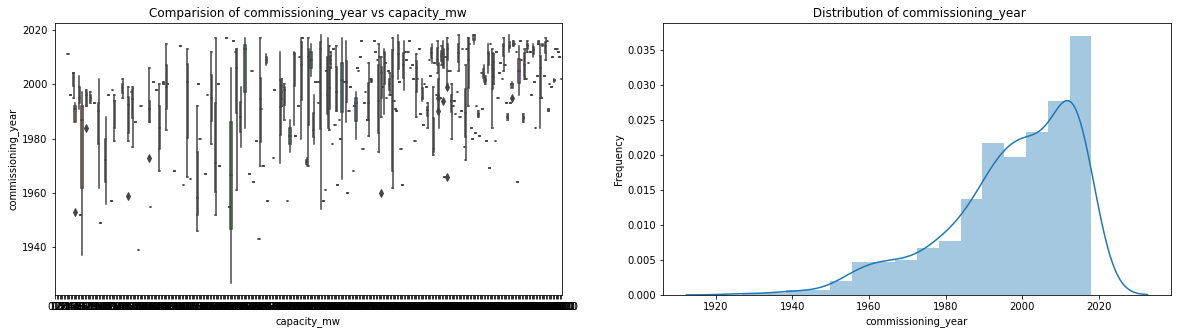

In [29]:
numeriacl_plot(df,variable='commissioning_year')

According to Commision year the capacity of power plant is fluctuation. At near 2020 capacity of power plant is high.

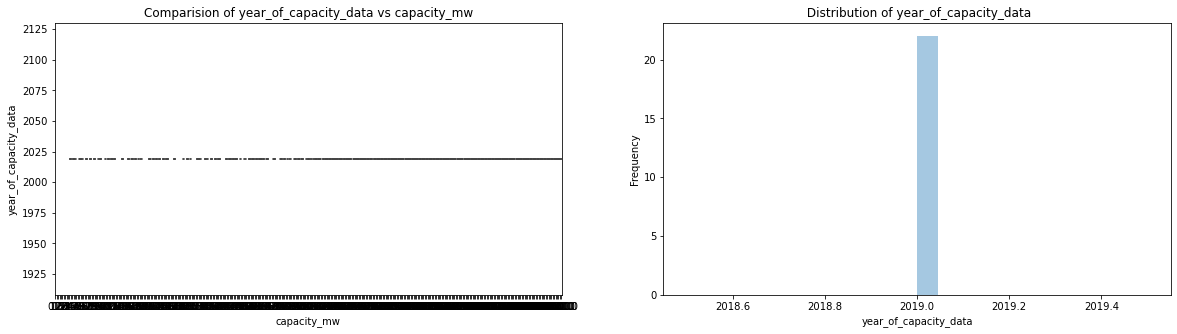

In [30]:
numeriacl_plot(df,variable='year_of_capacity_data')

According to year of capacity data in 2019 power plant capacity report is came,Year_of_capacity_data is not related with target variable,so we drop it.

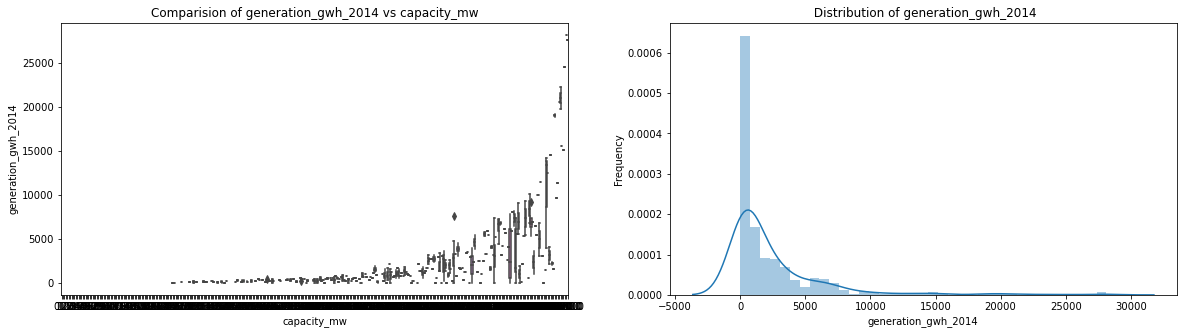

In [31]:
numeriacl_plot(df,variable='generation_gwh_2014')

According to generation 2014 the capacity of power plant in gwh reported near 25000mw

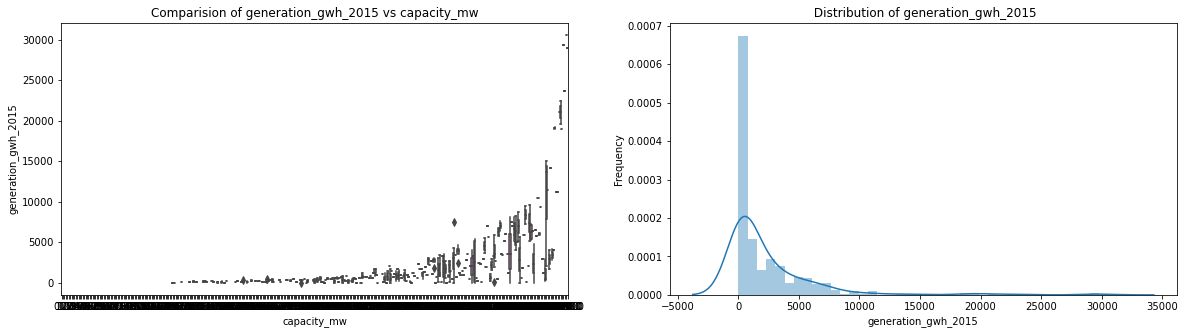

In [32]:
numeriacl_plot(df,variable='generation_gwh_2015')

According to generation 2015 the capacity of power plant in gwh reported near 30000mw

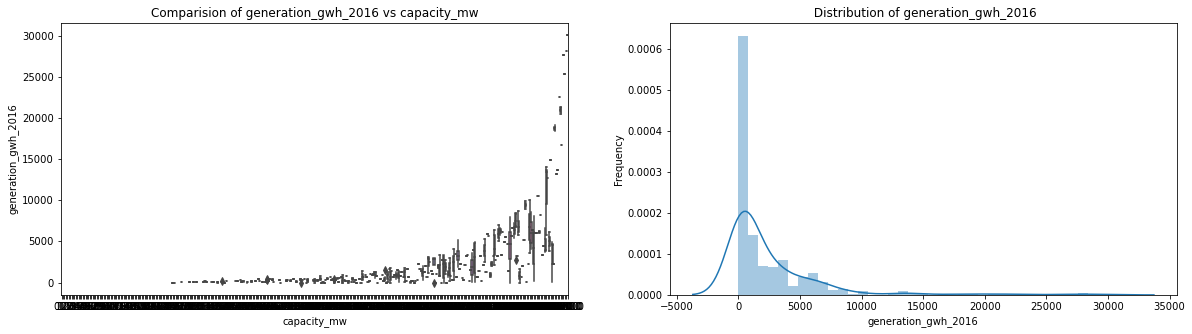

In [33]:
numeriacl_plot(df,variable='generation_gwh_2016')

According to generation 2016 the capacity of power plant in gwh reported near 30000mw

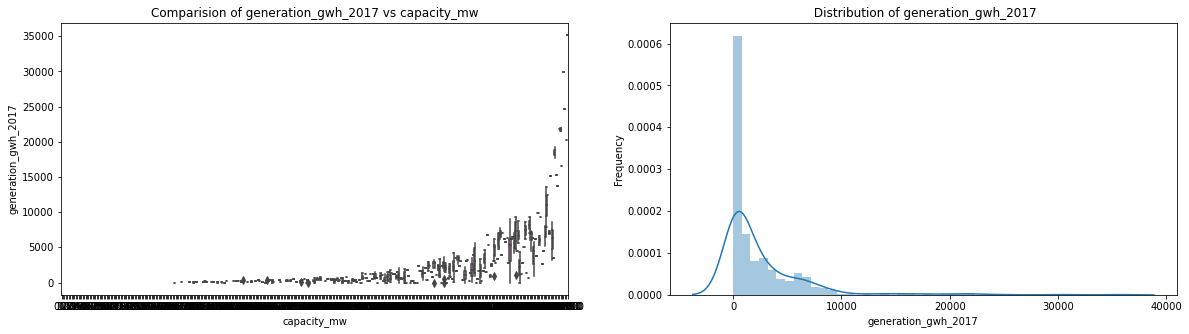

In [34]:
numeriacl_plot(df,variable='generation_gwh_2017')

According to generation 2017 the capacity of power plant in gwh reported near 35000mw

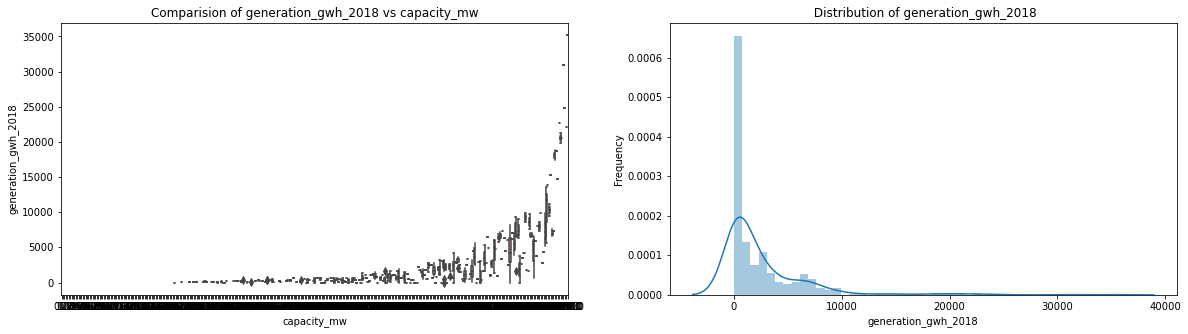

In [35]:
numeriacl_plot(df,variable='generation_gwh_2018')

According to generation 2018 the capacity of power plant in gwh reported near 35000mw

# Drop year_of_capacity_data it not correlated with target sowe remove it

In [36]:
df1=df1.drop(['year_of_capacity_data'],axis=1)
df1

capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407         2011.000000   
1           98.0   24.7663    74.6090         1997.091082   
2           39.2   21.9038    69.3732         1997.091082   
3          135.0   23.8712    91.3602         2004.000000   
4         1800.0   21.9603    82.4091         2015.000000   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568         2016.000000   
903          3.0   12.8932    78.1654         1997.091082   
904         25.5   15.2758    75.5811         1997.091082   
905         80.0   24.3500    73.7477         1997.091082   
906         16.5    9.9344    77.4768         1997.091082   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            2547.759305          2600.804099  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903          2547.759305          2600.804099  
904          2547.759305          2600.804099  
905          2547.759305          2600.804099  
906          2547.759305          2600.804099  

[907 rows x 9 columns]

# Create a dataset of object types

In [37]:
df2=df.select_dtypes('object')
df2

gppd_idnr primary_fuel other_fuel1  \
0    WRI1020239        Solar         NaN   
1    WRI1019881         Coal         NaN   
2    WRI1026669         Wind         NaN   
3    IND0000001          Gas         NaN   
4    IND0000002         Coal         Oil   
..          ...          ...         ...   
902  IND0000513         Coal         Oil   
903  WRI1026222        Solar         NaN   
904  WRI1026776         Wind         NaN   
905  WRI1019901         Coal         NaN   
906  WRI1026761         Wind         NaN   

                       geolocation_source         generation_data_source  
0    National Renewable Energy Laboratory                            NaN  
1                                     WRI                            NaN  
2                                     WRI                            NaN  
3                                     WRI  Central Electricity Authority  
4                                     WRI  Central Electricity Authority  
..                                    ...                            ...  
902                                   WRI  Central Electricity Authority  
903                        Industry About                            NaN  
904                                   WRI                            NaN  
905                                   WRI                            NaN  
906                                   WRI                            NaN  

[907 rows x 5 columns]

In [38]:
# check null values in object type dataset
df2.isnull().sum()

gppd_idnr                   0
primary_fuel                0
other_fuel1               709
geolocation_source         19
generation_data_source    458
dtype: int64

In [39]:
# Apply impute method to fill null values
from sklearn.impute import SimpleImputer

In [40]:
imp=SimpleImputer(strategy='most_frequent')

In [41]:
for i in df2.columns:
    df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))

In [42]:
df2.isnull().sum()

gppd_idnr                 0
primary_fuel              0
other_fuel1               0
geolocation_source        0
generation_data_source    0
dtype: int64

No null values are present in object type dataset after applying the imputer method

# Unique values in object type daatset

In [43]:
df2['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

There are many 10 or 12 character identifier for the power plant

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

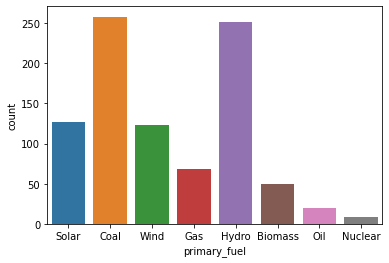

In [44]:
sns.countplot(df2['primary_fuel'])
df2['primary_fuel'].unique()

In our dataset, 8 types of fuel are used in power plants. Here coal and Hydro as fuel are very used. As primary fuel, most power plants use coal, then hydro comes at 2nd place after coal.

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

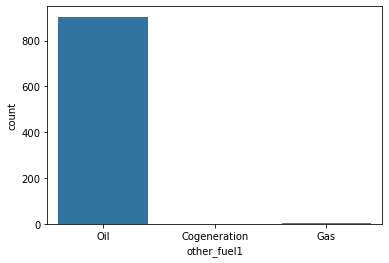

In [45]:
sns.countplot(df2['other_fuel1'])
df2['other_fuel1'].unique()

There are mainly other 3 types of fuel used. When another fuel is used then the oil is used as fuel

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

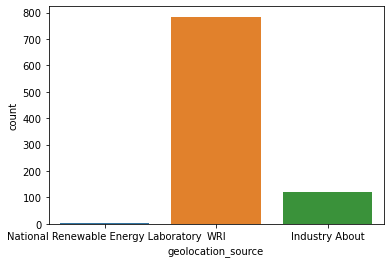

In [46]:
sns.countplot(df2['geolocation_source'])
df2['geolocation_source'].unique()

Here wri is used as geolocation_source

array(['Central Electricity Authority'], dtype=object)

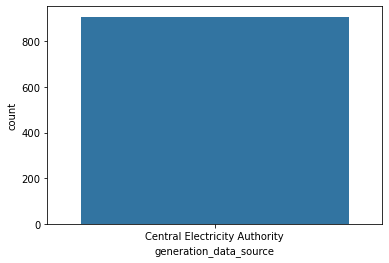

In [47]:
sns.countplot(df2['generation_data_source'])
df2['generation_data_source'].unique()

Here is only one Central Electricity Authority where we get generation data sources. Here is only one type of data so it is not important for us, so we drop it.

In [48]:
df2=df2.drop(['generation_data_source'],axis=1)

# Object type mix plot with target

In [49]:
def categorical_plot(df2,variable,invert_axis=False,target=df1['capacity_mw']):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    
    if invert_axis == False:
        sns.countplot(x = variable, data=df2,hue=df1["capacity_mw"],ax=ax[0])
    else:
        sns.countplot(y =variable, data=df2,hue=df1["capacity_mw"],ax=ax[0])
        
    ax[0].set_title(f"Comparision of {variable} vs capacity_mw")
    
    #plot the effect of variable on capacity_mw
    if invert_axis == False:
        sns.barplot(x = variable, y = target ,data=df2)
    else:
        sns.barplot(y =variable, x = target ,data=df2)
        
    ax[1].set_title("capacity_mw rate by {}".format(variable))
    ax[1].set_ylabel("Average(capacity)")
    plt.tight_layout()
    plt.show()

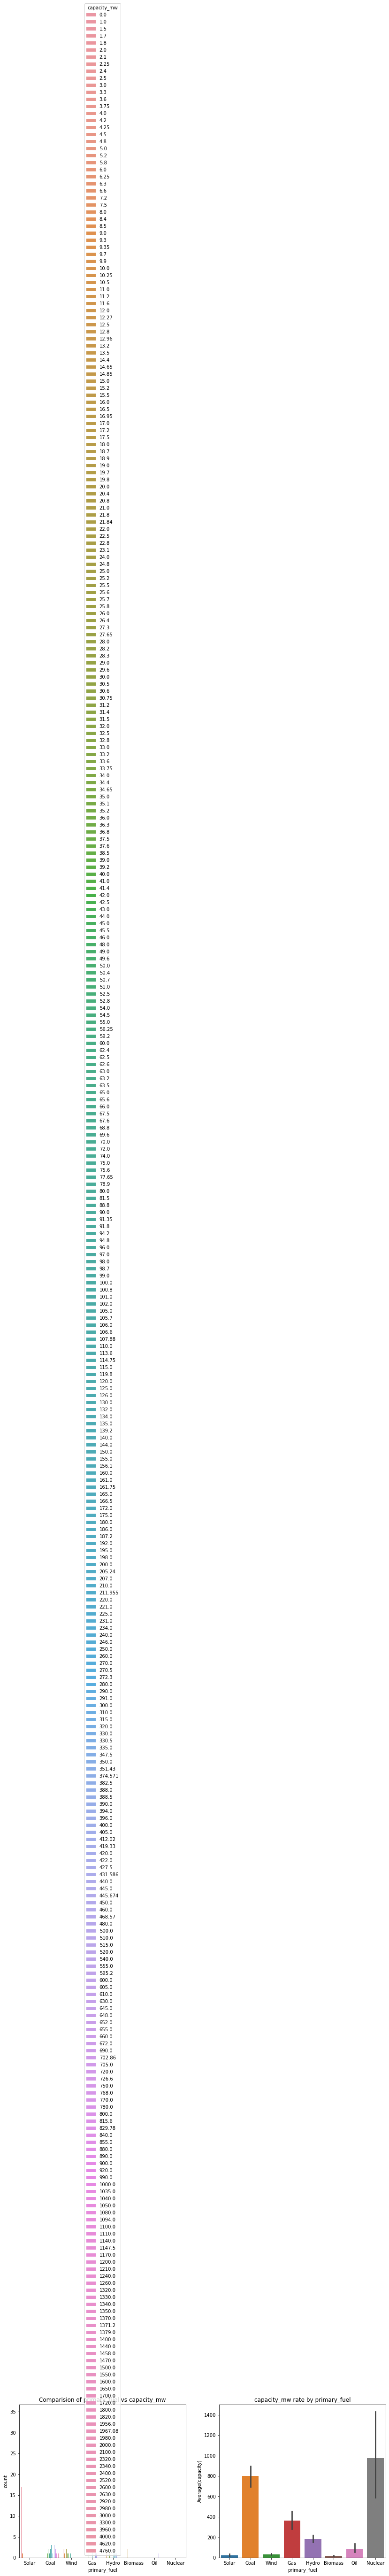

In [50]:
categorical_plot(df2,variable='primary_fuel')

As we have seen here major power capacity is present in nuclear fuel and coal is used to produce more power.
Coal produced power near 800mw and nuclear-produced power near 1000mw.

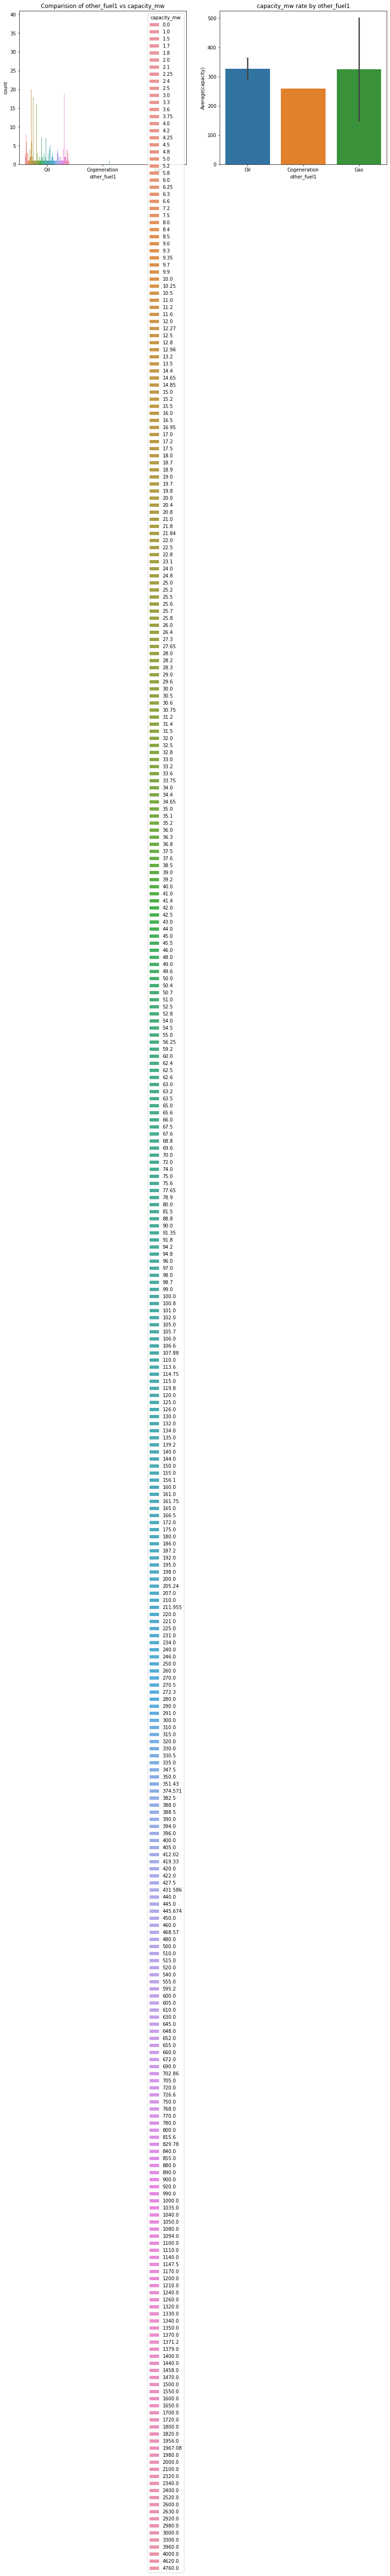

In [51]:
categorical_plot(df2,variable='other_fuel1')

As we have seen that here major power capacity is present in oil fuel and gas is used to produce more power

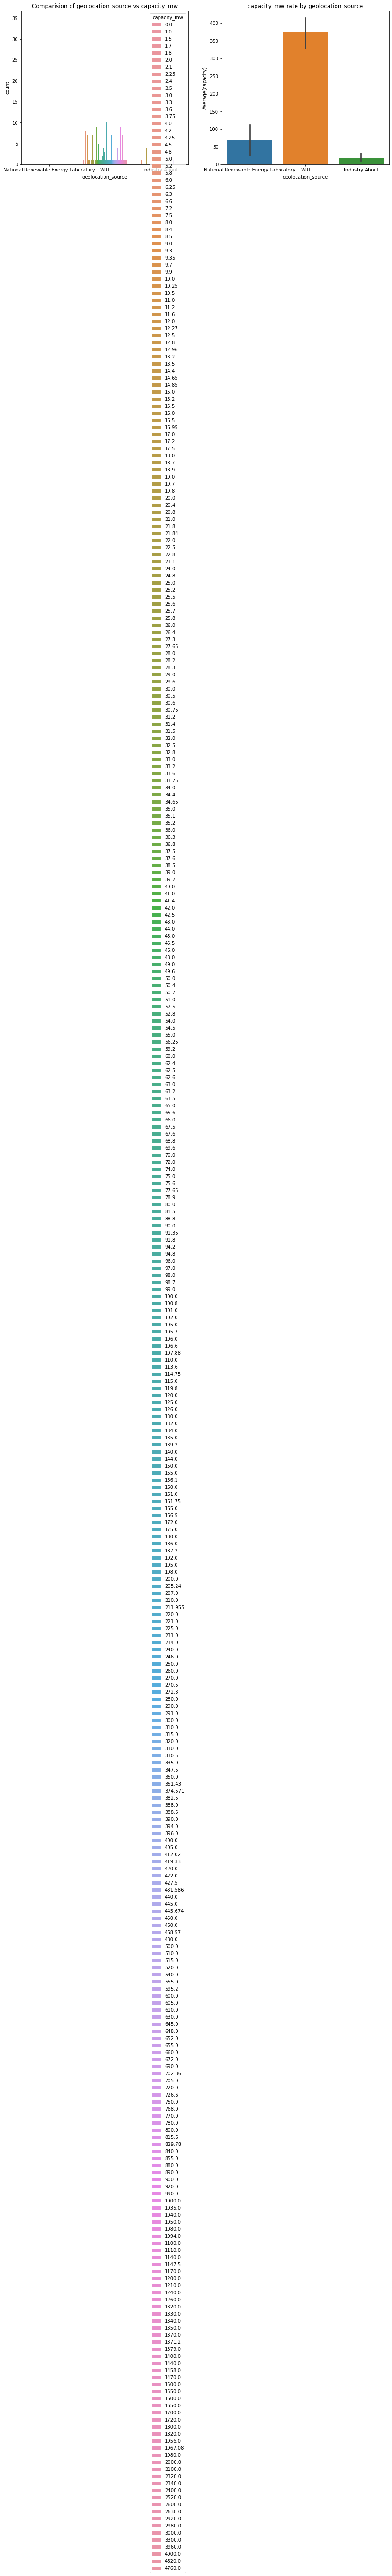

In [52]:
categorical_plot(df2,variable='geolocation_source')

# Change object type to int type

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()

In [55]:
for i in df2.columns:
    df2[i]=le.fit_transform(df2[i])

In [56]:
df3=pd.concat([df1,df2],axis=1)
df3

capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407         2011.000000   
1           98.0   24.7663    74.6090         1997.091082   
2           39.2   21.9038    69.3732         1997.091082   
3          135.0   23.8712    91.3602         2004.000000   
4         1800.0   21.9603    82.4091         2015.000000   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568         2016.000000   
903          3.0   12.8932    78.1654         1997.091082   
904         25.5   15.2758    75.5811         1997.091082   
905         80.0   24.3500    73.7477         1997.091082   
906         16.5    9.9344    77.4768         1997.091082   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  gppd_idnr  primary_fuel  \
0            2547.759305          2600.804099        657             6   
1            2547.759305          2600.804099        519             1   
2            2547.759305          2600.804099        853             7   
3             663.774500           626.239128          0             2   
4            5385.579736          7279.000000          1             1   
..                   ...                  ...        ...           ...   
902           865.400000           686.500000        491             1   
903          2547.759305          2600.804099        822             6   
904          2547.759305          2600.804099        891             7   
905          2547.759305          2600.804099        539             1   
906          2547.759305          2600.804099        876             7   

     other_fuel1  geolocation_source  
0              2                   1  
1              2                   2  
2              2                   2  
3              2                   2  
4              2                   2  
..           ...                 ...  
902            2                   2  
903            2                   0  
904            2                   2  
905            2                   2  
906            2                   2  

[907 rows x 13 columns]

In [57]:
df3.isnull().sum().sum()

0

# Describe statistic

In [58]:
df3.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.079148    4.812291           13.016360   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1997.091082   
50%      59.200000   21.281800   76.979200         1997.091082   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           2431.823590          2428.226946          2467.936859   
std            2665.338608          2859.349132          2877.890004   
min               0.000000             0.000000             0.000000   
25%            1211.362750           916.000000           896.500214   
50%            2431.823590          2428.226946          2467.936859   
75%            2431.823590          2428.226946          2467.936859   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018   gppd_idnr  primary_fuel  \
count           907.000000           907.000000  907.000000    907.000000   
mean           2547.759305          2600.804099  453.000000      3.206174   
std            2921.502193          3030.808041  261.972645      2.280652   
min               0.000000             0.000000    0.000000      0.000000   
25%             882.594850           824.842340  226.500000      1.000000   
50%            2547.759305          2600.804099  453.000000      3.000000   
75%            2547.759305          2600.804099  679.500000      6.000000   
max           35116.000000         35136.000000  906.000000      7.000000   

       other_fuel1  geolocation_source  
count   907.000000          907.000000  
mean      1.995590            1.733186  
std       0.081259            0.677151  
min       0.000000            0.000000  
25%       2.000000            2.000000  
50%       2.000000            2.000000  
75%       2.000000            2.000000  
max       2.000000            2.000000

1. Right side skewness are present->Capacity_mw,Longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,
2. Left side skewness are present--->Latitude
3. Outliers-->Capicty_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018

# Check Outliers 

In [59]:
col=df3.columns
ncol=6
nrow=3

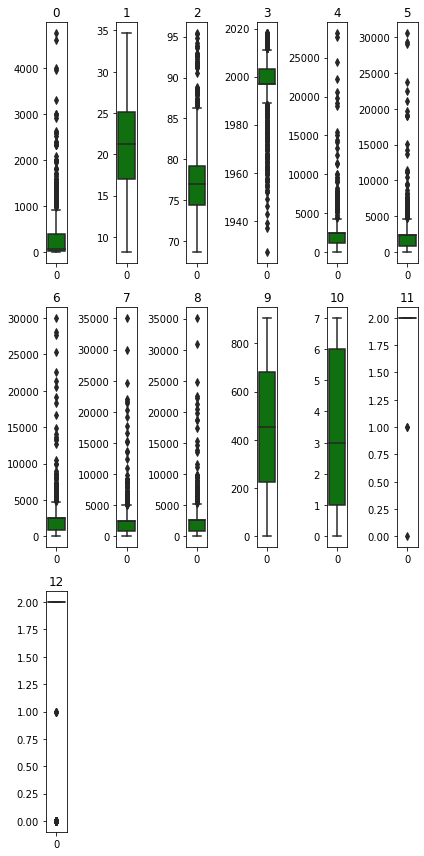

In [60]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df3[col[i]],color='green',orient='v')
    plt.savefig('Power_Plant_Outliers')
    plt.tight_layout()

Outliers are present-->capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
generation_gwh_2017,generation_gwh_2018,Source

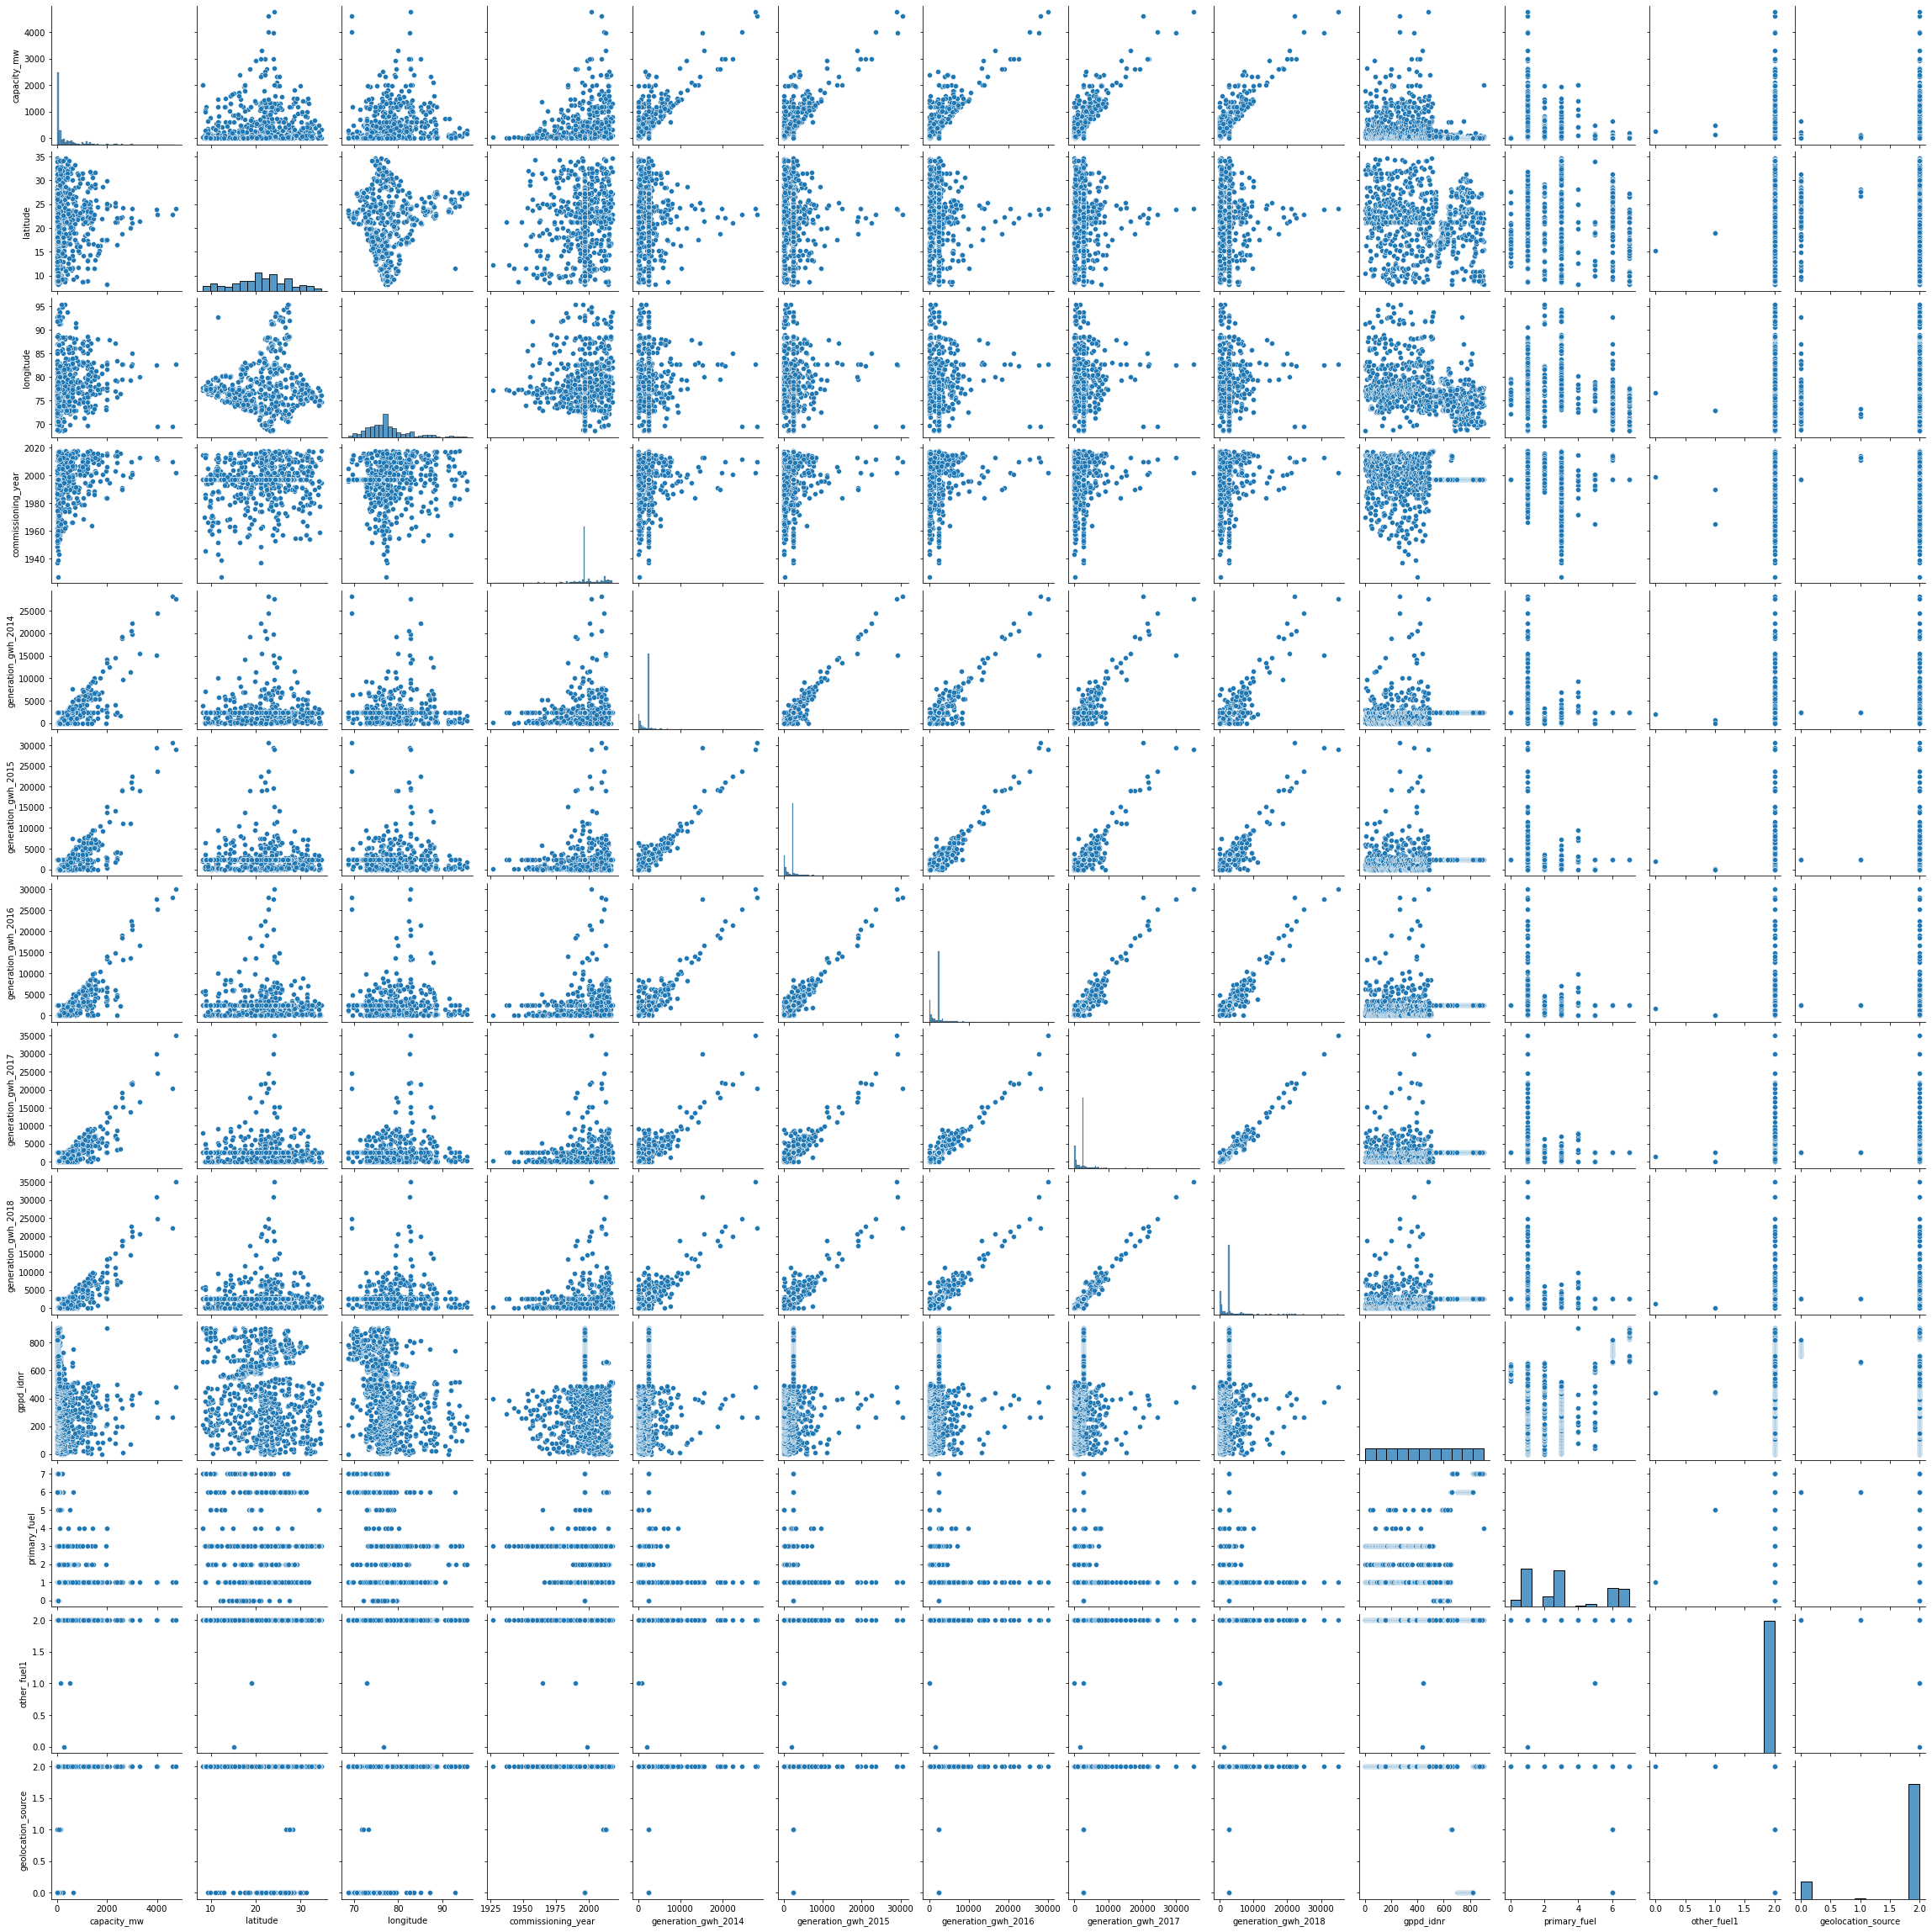

In [61]:
# pair plot
sns.pairplot(df3)

# Check skewness

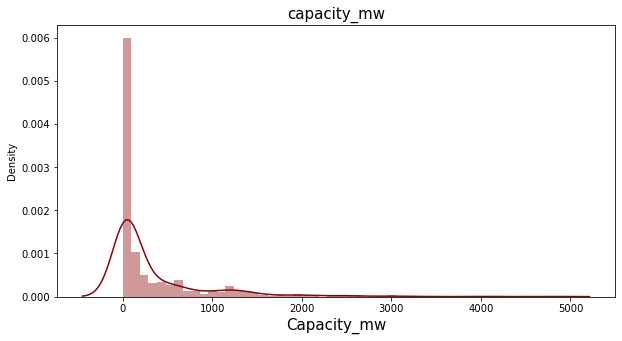

In [62]:
plt.figure(figsize=(10,5))

sns.distplot(df3['capacity_mw'],color='darkred')
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

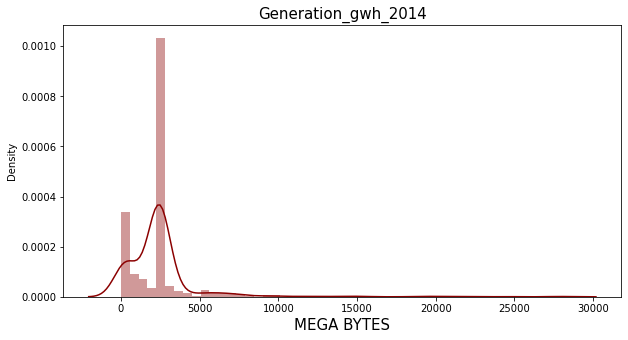

In [63]:
plt.figure(figsize=(10,5))

sns.distplot(df3['generation_gwh_2014'],color='darkred')
plt.title('Generation_gwh_2014', fontsize=15)
plt.xlabel('MEGA BYTES', fontsize=15)
plt.show()

Skewness is pesent in generation_gwh_2014 right side

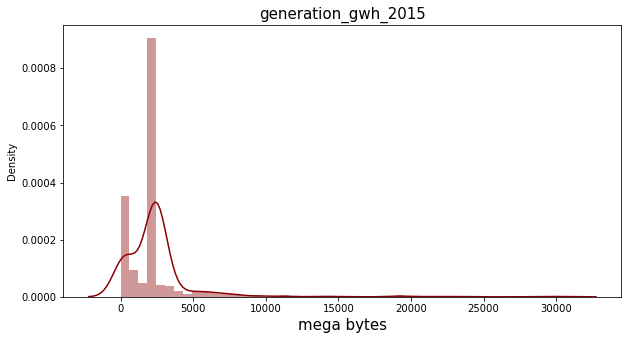

In [64]:
plt.figure(figsize=(10,5))

sns.distplot(df3['generation_gwh_2015'],color='darkred')
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('mega bytes', fontsize=15)
plt.show()

skewness is present in generation_gwh_2015 right side

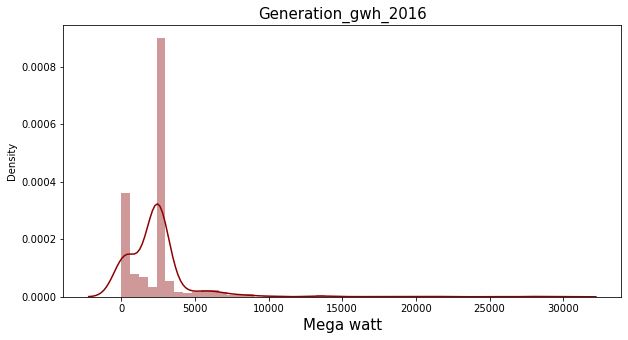

In [65]:
plt.figure(figsize=(10,5))

sns.distplot(df3['generation_gwh_2016'],color='darkred')
plt.title('Generation_gwh_2016', fontsize=15)
plt.xlabel('Mega watt', fontsize=15)
plt.show()

skewness is present in generation_gwh_2016 left side

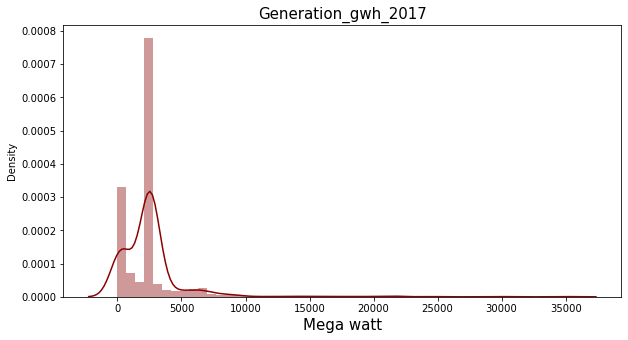

In [66]:
plt.figure(figsize=(10,5))

sns.distplot(df3['generation_gwh_2017'],color='darkred')
plt.title('Generation_gwh_2017', fontsize=15)
plt.xlabel('Mega watt', fontsize=15)
plt.show()

Skewness is present in generation_gwh_2017 left side

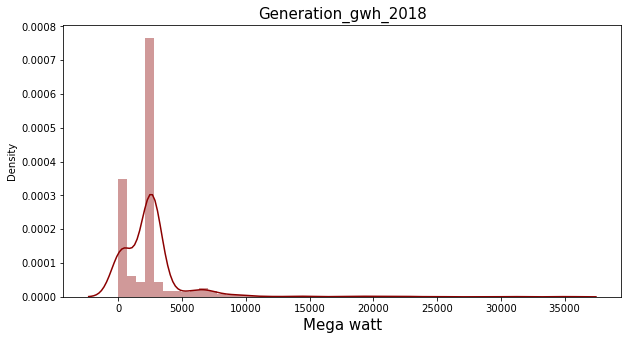

In [67]:
plt.figure(figsize=(10,5))

sns.distplot(df3['generation_gwh_2018'],color='darkred')
plt.title('Generation_gwh_2018', fontsize=15)
plt.xlabel('Mega watt', fontsize=15)
plt.show()

sskewness is present in generation_gwh_2018 left side

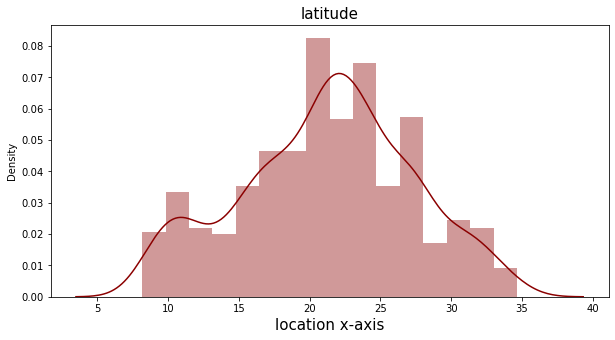

In [68]:
plt.figure(figsize=(10,5))

sns.distplot(df3['latitude'],color='darkred')
plt.title('latitude', fontsize=15)
plt.xlabel('location x-axis', fontsize=15)
plt.show()

not more skewness is present in latitude

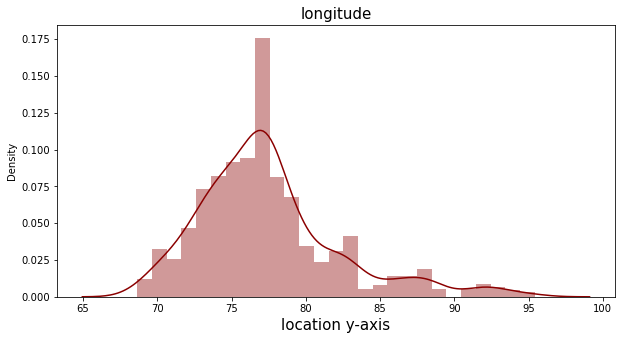

In [69]:
plt.figure(figsize=(10,5))

sns.distplot(df3['longitude'],color='darkred')
plt.title('longitude', fontsize=15)
plt.xlabel('location y-axis', fontsize=15)
plt.show()

Not more skewness is  present in longitude

# Bi-Varient Analysis

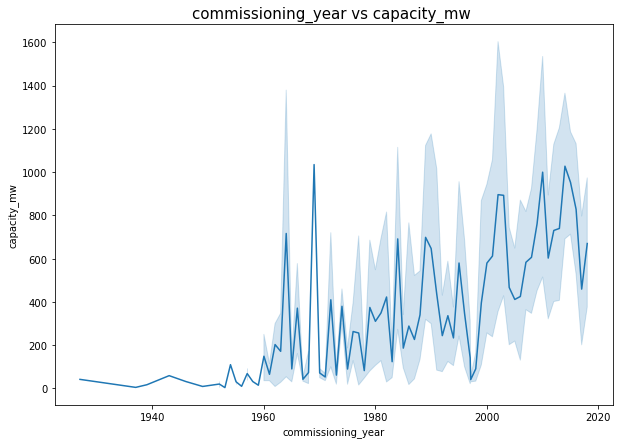

In [70]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df3, x='commissioning_year',y='capacity_mw',dashes=True)
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.show()

As years increase, increasing in power plant capacity year by year

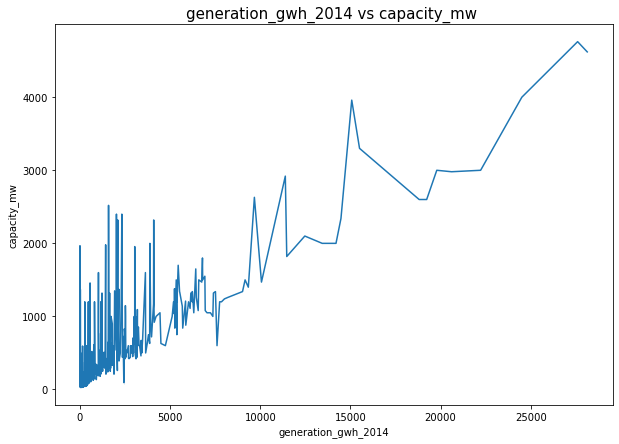

In [71]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df3, x='generation_gwh_2014',y='capacity_mw',dashes=True)
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.show()

In the year 2014, as power plant capacity increased, its generation capacity also increase

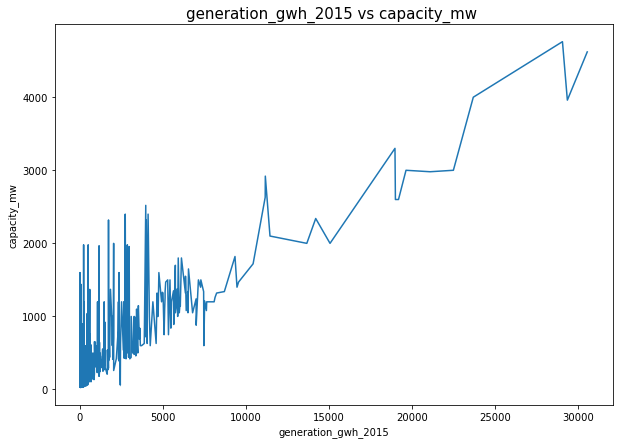

In [72]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df3, x='generation_gwh_2015',y='capacity_mw',dashes=True)
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.show()

In the year 2015, as power plant capacity increased, its generation capacity also increase

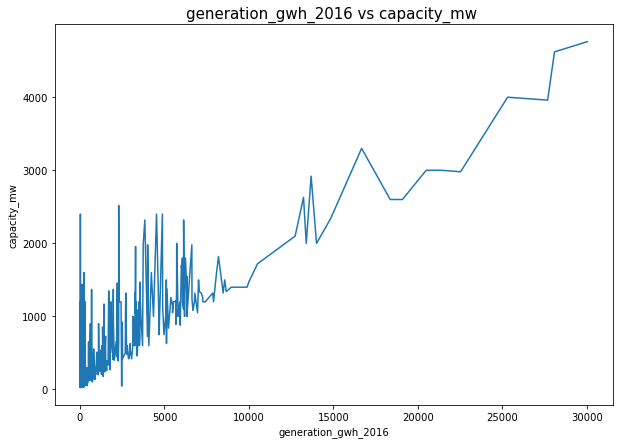

In [73]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df3, x='generation_gwh_2016',y='capacity_mw',dashes=True)
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.show()

In the year 2016, as power plant capacity increased, its generation capacity also increase

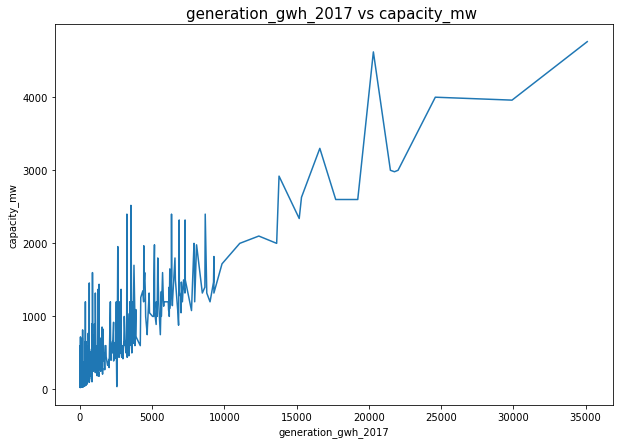

In [74]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df3, x='generation_gwh_2017',y='capacity_mw',dashes=True)
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.show()

In the year 2017, as power plant capacity increased, its generation capacity also increase

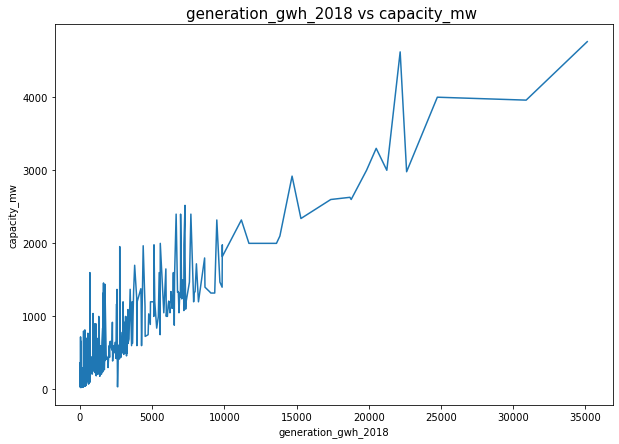

In [75]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df3, x='generation_gwh_2018',y='capacity_mw',dashes=True)
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)
plt.show()

In the year 2018, as power plant capacity increased, its generation capacity also increase

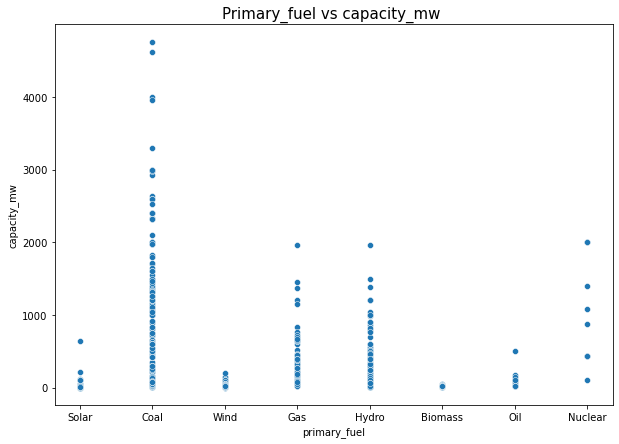

In [76]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
plt.title('Primary_fuel vs capacity_mw ', fontsize=15)
plt.show()

Most power is generated by coal. so we take coal as a primary fuel

# Check Correlation

In [77]:
df3.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw             1.000000  0.050984   0.195882            0.274292   
latitude                0.050984  1.000000   0.036362            0.102069   
longitude               0.195882  0.036362   1.000000            0.092331   
commissioning_year      0.274292  0.102069   0.092331            1.000000   
generation_gwh_2014     0.694350  0.044321   0.011472            0.133051   
generation_gwh_2015     0.711190  0.036398   0.018818            0.147338   
generation_gwh_2016     0.742221  0.031256   0.039209            0.170644   
generation_gwh_2017     0.757585  0.031212   0.039675            0.170863   
generation_gwh_2018     0.773456  0.031326   0.037780            0.174377   
gppd_idnr              -0.335742 -0.105728  -0.377812            0.044059   
primary_fuel           -0.380395 -0.010204  -0.347948           -0.126650   
other_fuel1             0.003105  0.036695   0.030311            0.036904   
geolocation_source      0.204865 -0.184275   0.252343           -0.007844   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                 6.943503e-01         7.111899e-01   
latitude                    4.432124e-02         3.639795e-02   
longitude                   1.147221e-02         1.881819e-02   
commissioning_year          1.330505e-01         1.473376e-01   
generation_gwh_2014         1.000000e+00         9.535943e-01   
generation_gwh_2015         9.535943e-01         1.000000e+00   
generation_gwh_2016         9.258738e-01         9.688877e-01   
generation_gwh_2017         8.916868e-01         9.282425e-01   
generation_gwh_2018         8.849556e-01         9.234611e-01   
gppd_idnr                   4.451808e-02         3.895798e-02   
primary_fuel               -1.247688e-01        -1.248280e-01   
other_fuel1                 2.450509e-02         2.679006e-02   
geolocation_source          3.156335e-17         1.582431e-17   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                 7.422211e-01         7.575852e-01   
latitude                    3.125609e-02         3.121240e-02   
longitude                   3.920892e-02         3.967547e-02   
commissioning_year          1.706440e-01         1.708631e-01   
generation_gwh_2014         9.258738e-01         8.916868e-01   
generation_gwh_2015         9.688877e-01         9.282425e-01   
generation_gwh_2016         1.000000e+00         9.646488e-01   
generation_gwh_2017         9.646488e-01         1.000000e+00   
generation_gwh_2018         9.571589e-01         9.826888e-01   
gppd_idnr                   2.683096e-02         2.285274e-02   
primary_fuel               -1.310514e-01        -1.320034e-01   
other_fuel1                 3.157459e-02         2.111693e-02   
geolocation_source          2.345595e-17         4.059479e-18   

                     generation_gwh_2018  gppd_idnr  primary_fuel  \
capacity_mw                 7.734556e-01  -0.335742     -0.380395   
latitude                    3.132625e-02  -0.105728     -0.010204   
longitude                   3.777965e-02  -0.377812     -0.347948   
commissioning_year          1.743766e-01   0.044059     -0.126650   
generation_gwh_2014         8.849556e-01   0.044518     -0.124769   
generation_gwh_2015         9.234611e-01   0.038958     -0.124828   
generation_gwh_2016         9.571589e-01   0.026831     -0.131051   
generation_gwh_2017         9.826888e-01   0.022853     -0.132003   
generation_gwh_2018         1.000000e+00   0.019265     -0.136983   
gppd_idnr                   1.926543e-02   1.000000      0.609180   
primary_fuel               -1.369831e-01   0.609180      1.000000   
other_fuel1                 3.567517e-02   0.002333      0.004912   
geolocation_source          3.362799e-19  -0.464174     -0.483217   

                     other_fuel1  geolocation_source  
capacity_mw             0.003105        2.048653e-01  
latitude                0.036695       -1.8

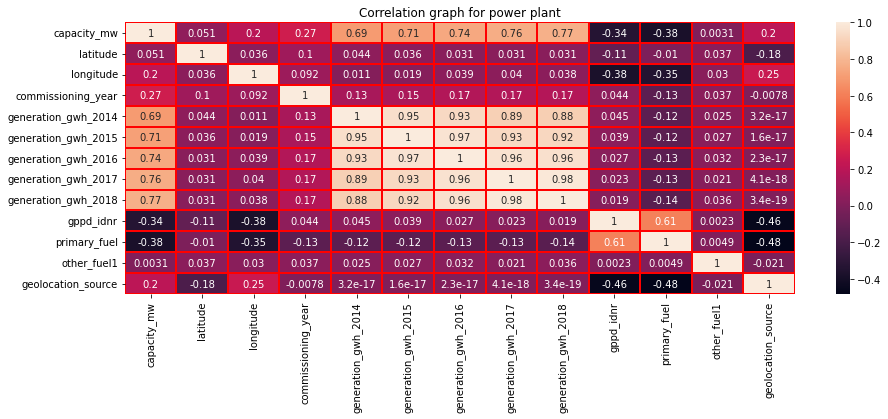

In [78]:
# For more understand drow heeatmap
plt.figure(figsize=(15,5))
sns.heatmap(df3.corr(),linewidth=2,linecolor='red',annot=True)
plt.title('Correlation graph for power plant')
plt.savefig('Correlation graph for power plant')
plt.show()

1. Latitude is correlated with target with 5.1%, it is the poor bond between. 
2. Longitude is correlated with target with 20%, it is the good bond between. 
3. Commisioning_year is correlated with target with 27%, it is the good bond between.
4. generation_gwh_2014 is correlated with target with 69%, it is the strong bond between.
5. generation_gwh_2015 is correlated with target with 71%, it is the strong bond between 
6. generation_gwh_2016 is correlated with target with 74%, it is the strong bond between 
7. generation_gwh_2017 is correlated with target with 76%, it is the strong bond between 
8. generation_gwh_2018 is correlated with target with 77%, it is the strong bond between 
9. Gppd_idnr is correlated with target with -34%, it is the good bond between 
10. Primary_fuel is correlated with target with -38%, it is the good bond between 
11. Other_fuel_1 is correlated with target with 0.31%, it is the very poor bond between 
12. Geolocation_source is correlated with target with 20%, it is the good bond between.

Very poor bond-->other_fuel_1
so we drop it.

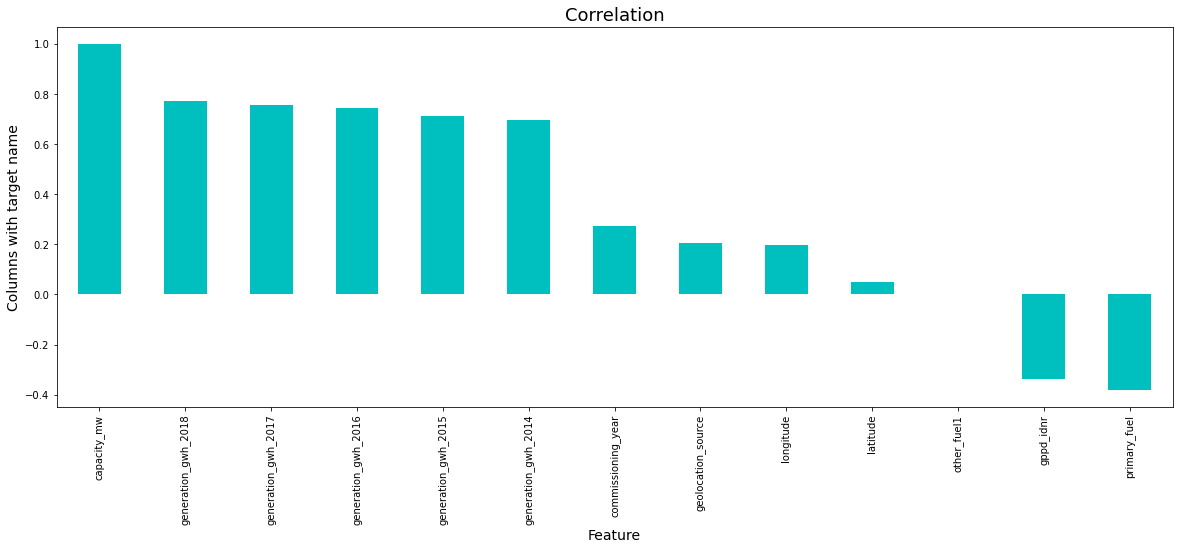

In [79]:
plt.figure(figsize=(20,7))
df3.corr()['capacity_mw'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here gridd_idnr and primary_fuel1 are negatively correlated and others are positively correlated

# Check outliers

In [80]:
# outliers laibary
from scipy.stats import zscore

In [81]:
(np.abs(zscore(df3))<3).all().all()  #check outliers in whole dataset

False

In [82]:
# check outliers in each columns
(np.abs(zscore(df3))<3).all()

capacity_mw            False
latitude                True
longitude              False
commissioning_year     False
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
gppd_idnr               True
primary_fuel            True
other_fuel1            False
geolocation_source      True
dtype: bool

Outliers are present-->
1.capacity_mw               False
2.longitude                 False
3.year_of_capacity_data     False
4.generation_gwh_2014       False
5.generation_gwh_2015       False
6.generation_gwh_2016       False
7.generation_gwh_2017       False
8.generation_gwh_2018       False
9.source                    False
10.generation_data_source   False

In [83]:
df1   #Numerical data

capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407         2011.000000   
1           98.0   24.7663    74.6090         1997.091082   
2           39.2   21.9038    69.3732         1997.091082   
3          135.0   23.8712    91.3602         2004.000000   
4         1800.0   21.9603    82.4091         2015.000000   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568         2016.000000   
903          3.0   12.8932    78.1654         1997.091082   
904         25.5   15.2758    75.5811         1997.091082   
905         80.0   24.3500    73.7477         1997.091082   
906         16.5    9.9344    77.4768         1997.091082   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            2547.759305          2600.804099  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903          2547.759305          2600.804099  
904          2547.759305          2600.804099  
905          2547.759305          2600.804099  
906          2547.759305          2600.804099  

[907 rows x 9 columns]

# we don't touch object-type data and target and do not apply any type of transformation on it so we separate it

In [84]:
df2['capacity_mw']=df1['capacity_mw']   #object type data with target

In [85]:
df2

gppd_idnr  primary_fuel  other_fuel1  geolocation_source  capacity_mw
0          657             6            2                   1          2.5
1          519             1            2                   2         98.0
2          853             7            2                   2         39.2
3            0             2            2                   2        135.0
4            1             1            2                   2       1800.0
..         ...           ...          ...                 ...          ...
902        491             1            2                   2       1600.0
903        822             6            2                   0          3.0
904        891             7            2                   2         25.5
905        539             1            2                   2         80.0
906        876             7            2                   2         16.5

[907 rows x 5 columns]

In [86]:
# Other fuel is not correlated with target so we dro it.
df2=df2.drop(['other_fuel1'],axis=1)

# Apply IQR method

### Remove capacity_mw bcoz we do not apply any transformation on dependent and object type data

In [87]:
df1

capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407         2011.000000   
1           98.0   24.7663    74.6090         1997.091082   
2           39.2   21.9038    69.3732         1997.091082   
3          135.0   23.8712    91.3602         2004.000000   
4         1800.0   21.9603    82.4091         2015.000000   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568         2016.000000   
903          3.0   12.8932    78.1654         1997.091082   
904         25.5   15.2758    75.5811         1997.091082   
905         80.0   24.3500    73.7477         1997.091082   
906         16.5    9.9344    77.4768         1997.091082   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            2547.759305          2600.804099  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903          2547.759305          2600.804099  
904          2547.759305          2600.804099  
905          2547.759305          2600.804099  
906          2547.759305          2600.804099  

[907 rows x 9 columns]

In [88]:
df1=df1.drop(['capacity_mw'],axis=1)

# Apply outliers removal method on this dataset

In [89]:
q1=df1.quantile(0.25)
q1

latitude                 17.072000
longitude                74.388900
commissioning_year     1997.091082
generation_gwh_2014    1211.362750
generation_gwh_2015     916.000000
generation_gwh_2016     896.500214
generation_gwh_2017     882.594850
generation_gwh_2018     824.842340
Name: 0.25, dtype: float64

In [90]:
q2=df1.quantile(0.75)
q2

latitude                 25.176450
longitude                79.206100
commissioning_year     2003.000000
generation_gwh_2014    2431.823590
generation_gwh_2015    2428.226946
generation_gwh_2016    2467.936859
generation_gwh_2017    2547.759305
generation_gwh_2018    2600.804099
Name: 0.75, dtype: float64

In [91]:
iqr=q2-q1
iqr

latitude                  8.104450
longitude                 4.817200
commissioning_year        5.908918
generation_gwh_2014    1220.460840
generation_gwh_2015    1512.226946
generation_gwh_2016    1571.436645
generation_gwh_2017    1665.164455
generation_gwh_2018    1775.961758
dtype: float64

In [92]:
upper=q2+(1.5*iqr)
lower=q1-(1.5*iqr)

In [93]:
df1=df1[(df1>lower) & (df1<upper)]
df1

latitude  longitude  commissioning_year  generation_gwh_2014  \
0     28.1839    73.2407         2011.000000          2431.823590   
1     24.7663    74.6090         1997.091082          2431.823590   
2     21.9038    69.3732         1997.091082          2431.823590   
3     23.8712        NaN         2004.000000           617.789264   
4     21.9603    82.4091                 NaN          3035.550000   
..        ...        ...                 ...                  ...   
902   16.2949    77.3568                 NaN          2431.823590   
903   12.8932    78.1654         1997.091082          2431.823590   
904   15.2758    75.5811         1997.091082          2431.823590   
905   24.3500    73.7477         1997.091082          2431.823590   
906    9.9344    77.4768         1997.091082          2431.823590   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2428.226946          2467.936859          2547.759305   
1            2428.226946          2467.936859          2547.759305   
2            2428.226946          2467.936859          2547.759305   
3             843.747000           886.004428           663.774500   
4                    NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903          2428.226946          2467.936859          2547.759305   
904          2428.226946          2467.936859          2547.759305   
905          2428.226946          2467.936859          2547.759305   
906          2428.226946          2467.936859          2547.759305   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4                    NaN  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[907 rows x 8 columns]

In [94]:
df1.isnull().sum()

latitude                 0
longitude               62
commissioning_year     267
generation_gwh_2014     68
generation_gwh_2015     70
generation_gwh_2016     74
generation_gwh_2017     77
generation_gwh_2018     77
dtype: int64

In [95]:
# Remove null values
from sklearn.impute import SimpleImputer

In [96]:
imp=SimpleImputer(strategy='mean')

In [97]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [98]:
df1

latitude  longitude  commissioning_year  generation_gwh_2014  \
0     28.1839  73.240700         2011.000000          2431.823590   
1     24.7663  74.609000         1997.091082          2431.823590   
2     21.9038  69.373200         1997.091082          2431.823590   
3     23.8712  76.557193         2004.000000           617.789264   
4     21.9603  82.409100         1998.469705          3035.550000   
..        ...        ...                 ...                  ...   
902   16.2949  77.356800         1998.469705          2431.823590   
903   12.8932  78.165400         1997.091082          2431.823590   
904   15.2758  75.581100         1997.091082          2431.823590   
905   24.3500  73.747700         1997.091082          2431.823590   
906    9.9344  77.476800         1997.091082          2431.823590   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2428.226946          2467.936859          2547.759305   
1            2428.226946          2467.936859          2547.759305   
2            2428.226946          2467.936859          2547.759305   
3             843.747000           886.004428           663.774500   
4            1840.896308          1853.607128          1909.661252   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903          2428.226946          2467.936859          2547.759305   
904          2428.226946          2467.936859          2547.759305   
905          2428.226946          2467.936859          2547.759305   
906          2428.226946          2467.936859          2547.759305   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            1926.922305  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[907 rows x 8 columns]

In [99]:
df1.isnull().sum()  #check null values after apply impute method

latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [100]:
(np.abs(zscore(df1))<3).all()

latitude                True
longitude               True
commissioning_year     False
generation_gwh_2014     True
generation_gwh_2015     True
generation_gwh_2016     True
generation_gwh_2017     True
generation_gwh_2018     True
dtype: bool

No null values are present

# Check skewness

In [101]:
df1.skew()

latitude              -0.149698
longitude              0.307448
commissioning_year     1.417787
generation_gwh_2014   -0.810500
generation_gwh_2015   -0.604024
generation_gwh_2016   -0.575948
generation_gwh_2017   -0.530402
generation_gwh_2018   -0.486191
dtype: float64

# Take threshold values for skewness is +/-0.5,then skew is present in-->
1. commissioning_year-->    1.417787
2. generation_gwh_2014-->  -0.810500
3. generation_gwh_2015-->   -0.604024
4. generation_gwh_2016-->   -0.575948
5. generation_gwh_2017-->  -0.530402

# Remove skewness

In [102]:
from sklearn.preprocessing import power_transform

In [103]:
pt =power_transform

In [104]:
df3=pt(df1,method='yeo-johnson')

In [105]:
type(df3)

numpy.ndarray

After apply power method our dataset change from dataframe to numpy array,so first we change it into dataframe 

In [106]:
df4=pd.DataFrame(data=df3,columns=df1.columns)
df4

latitude  longitude  commissioning_year  generation_gwh_2014  \
0    1.159436  -0.986022        1.409983e-14             0.588109   
1    0.579032  -0.546600       -1.554312e-15             0.588109   
2    0.099912  -2.332660       -1.554312e-15             0.588109   
3    0.428491   0.049014        6.272760e-15            -1.286832   
4    0.109302   1.651023        0.000000e+00             1.171776   
..        ...        ...                 ...                  ...   
902 -0.817376   0.283841        0.000000e+00             0.588109   
903 -1.357110   0.515883       -1.554312e-15             0.588109   
904 -0.980536  -0.245138       -1.554312e-15             0.588109   
905  0.508938  -0.821089       -1.554312e-15             0.588109   
906 -1.813900   0.318617       -1.554312e-15             0.588109   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.594907             0.607477             0.609881   
1               0.594907             0.607477             0.609881   
2               0.594907             0.607477             0.609881   
3              -0.891460            -0.824500            -1.066065   
4               0.077668             0.087103             0.095121   
..                   ...                  ...                  ...   
902            -2.005230            -1.583160            -0.855506   
903             0.594907             0.607477             0.609881   
904             0.594907             0.607477             0.609881   
905             0.594907             0.607477             0.609881   
906             0.594907             0.607477             0.609881   

     generation_gwh_2018  
0               0.626952  
1               0.626952  
2               0.626952  
3              -1.077823  
4               0.108967  
..                   ...  
902            -1.012984  
903             0.626952  
904             0.626952  
905             0.626952  
906             0.626952  

[907 rows x 8 columns]

In [107]:
df4.skew()

latitude              -0.074269
longitude             -0.001464
commissioning_year     0.000000
generation_gwh_2014   -0.899949
generation_gwh_2015   -0.813247
generation_gwh_2016   -0.802496
generation_gwh_2017   -0.798609
generation_gwh_2018   -0.792918
dtype: float64

As we see that after apply 1st time skewness is not remove,so we try once more time.

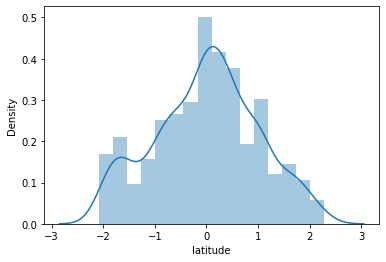

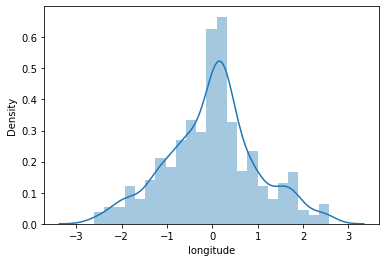

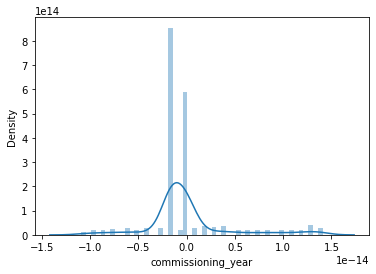

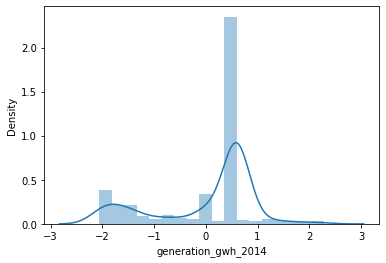

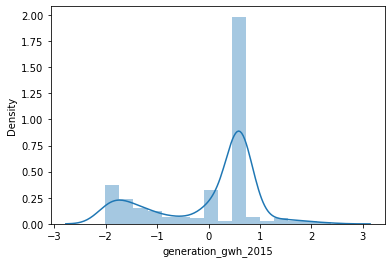

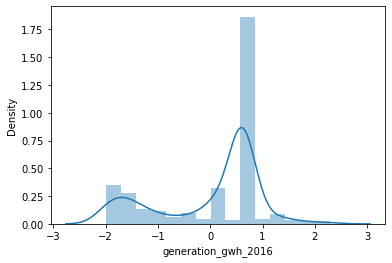

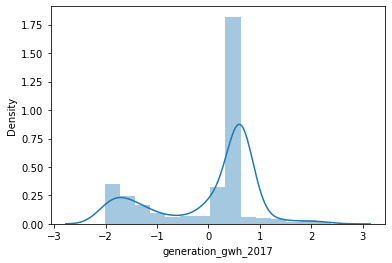

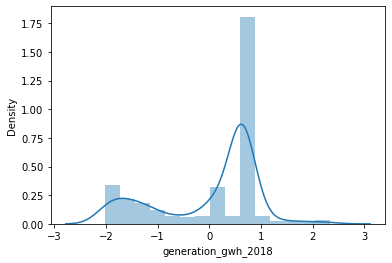

In [108]:
for i in df4.columns:
    plt.figure()
    sns.distplot(df4[i])

In [109]:
x=power_transform(df4)

In [110]:
x1=pd.DataFrame(x,columns=df1.columns)

In [111]:
x1.skew()

latitude               0.015915
longitude              0.019428
commissioning_year    -2.800566
generation_gwh_2014    0.221871
generation_gwh_2015    0.189276
generation_gwh_2016    0.152795
generation_gwh_2017    0.186216
generation_gwh_2018    0.181738
dtype: float64

More Skewness is not removed bcoz in our dataset large number of null values are present, so we apply the different methods to fill them so it shoe skewness in the dataset

Commissionning year does not remove skewness so we drop it

# merge both object and int type dataset

In [112]:
df=pd.concat([x1,df2],axis=1)
df

latitude  longitude  commissioning_year  generation_gwh_2014  \
0    1.169882  -0.985714            0.645040             0.505827   
1    0.566160  -0.548924           -0.146334             0.505827   
2    0.078091  -2.318612           -0.146334             0.505827   
3    0.411650   0.045344            0.645040            -1.280996   
4    0.087546   1.657254            0.645040             1.591464   
..        ...        ...                 ...                  ...   
902 -0.823480   0.280548            0.645040             0.505827   
903 -1.339370   0.513414           -0.146334             0.505827   
904 -0.980329  -0.248522           -0.146334             0.505827   
905  0.494098  -0.821903           -0.146334             0.505827   
906 -1.770141   0.315421           -0.146334             0.505827   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.512405             0.529201             0.535255   
1               0.512405             0.529201             0.535255   
2               0.512405             0.529201             0.535255   
3              -1.021547            -0.978737            -1.131575   
4              -0.186214            -0.180737            -0.161216   
..                   ...                  ...                  ...   
902            -1.642848            -1.430204            -0.993218   
903             0.512405             0.529201             0.535255   
904             0.512405             0.529201             0.535255   
905             0.512405             0.529201             0.535255   
906             0.512405             0.529201             0.535255   

     generation_gwh_2018  gppd_idnr  primary_fuel  geolocation_source  \
0               0.559946        657             6                   1   
1               0.559946        519             1                   2   
2               0.559946        853             7                   2   
3              -1.140880          0             2                   2   
4              -0.149671          1             1                   2   
..                   ...        ...           ...                 ...   
902            -1.099893        491             1                   2   
903             0.559946        822             6                   0   
904             0.559946        891             7                   2   
905             0.559946        539             1                   2   
906             0.559946        876             7                   2   

     capacity_mw  
0            2.5  
1           98.0  
2           39.2  
3          135.0  
4         1800.0  
..           ...  
902       1600.0  
903          3.0  
904         25.5  
905         80.0  
906         16.5  

[907 rows x 12 columns]

# Check Multicolonility in dataset

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variable']=df.columns
    vif['VIF Factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return[vif]

In [115]:
calc_vif(df)

[               Variable  VIF Factor
 0              latitude    1.056154
 1             longitude    1.278243
 2    commissioning_year    1.038853
 3   generation_gwh_2014    2.723547
 4   generation_gwh_2015    3.363957
 5   generation_gwh_2016    4.097826
 6   generation_gwh_2017    3.998197
 7   generation_gwh_2018    3.824372
 8             gppd_idnr    6.844705
 9          primary_fuel    5.073798
 10   geolocation_source    3.459728
 11          capacity_mw    1.539349]

Not multi coloniality present in our dataset

# split in independent and dependent variable

In [116]:
x=df.drop(['capacity_mw','commissioning_year'],axis=1)

In [117]:
y=df.capacity_mw

# Standard scaler method

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
st=StandardScaler()

In [120]:
x=st.fit_transform(x)

# Apply diffrent method for find best model

# Train_Test_split Method

In [121]:
LI=LinearRegression()
DT=DecisionTreeRegressor()
SV=SVR()
KN=KNeighborsRegressor()
AD=AdaBoostRegressor()
GB=GradientBoostingRegressor()
RF=RandomForestRegressor()

# MODEL-LINEAR REGRESSION

In [123]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    LI.fit(x_train,y_train)
    test_pred=LI.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.15918148742246885 Random_state at 0
Max accuracy 0.15918148742246885 Max_Random_state 0


Accuracy 0.13539086697808989 Random_state at 1
Accuracy 0.24032421984706553 Random_state at 2
Max accuracy 0.24032421984706553 Max_Random_state 2


Accuracy 0.2448220892788444 Random_state at 3
Max accuracy 0.2448220892788444 Max_Random_state 3


Accuracy 0.11634816610017862 Random_state at 4
Accuracy 0.2165171550613103 Random_state at 5
Accuracy 0.22653374439591234 Random_state at 6
Accuracy 0.21387935025003413 Random_state at 7
Accuracy 0.2879592128766919 Random_state at 8
Max accuracy 0.2879592128766919 Max_Random_state 8


Accuracy 0.1730752278503116 Random_state at 9
Accuracy 0.16028460885009632 Random_state at 10
Accuracy 0.13268463191365554 Random_state at 11
Accuracy 0.12365676043234719 Random_state at 12
Accuracy 0.20492945910329396 Random_state at 13
Accuracy 0.21217717668000313 Random_state at 14
Accuracy 0.13543597771510107 Random_state at 15
Accuracy 0.0969863973400582 Rand

At random state 8 model give accuracy 28.79%

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=8)
LI.fit(x_train,y_train)
pred=LI.predict(x_test)
pred_train=LI.predict(x_train)

MAE_LI=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_LI}")

MSE_LI=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_LI}")

RMSE_LI=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_LI}")

TEST_SCORE_LI=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_LI}")

TRAIN_SCORE_LI=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_LI}")


Mean_Absolute_Error: 266.7683422411407
Mean_Squared_Error: 191131.19638157196
Root_Mean_Absolute_Error: 437.1855399959747
Accuracy_Score of test: 28.79592128766919
Accuracy_Score of train: 19.71197180122105


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. Accuracy score has come near 29%, it is not good so we try another model to find the best model
3. Here in this model we get that overfitting present in our dataset bcoz test abs train accuracy is not equal

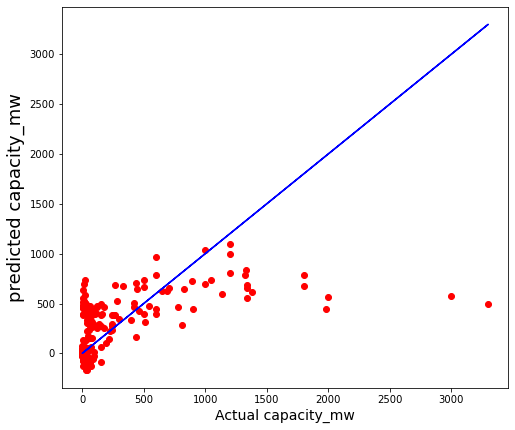

In [125]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

It looks like very poor model.

# MODEL-->DECISION TREE REGREEOSR

In [127]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    test_pred=DT.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.6230456416769337 Random_state at 0
Max accuracy 0.6230456416769337 Max_Random_state 0


Accuracy 0.36473359503169756 Random_state at 1
Accuracy 0.5090120369018083 Random_state at 2
Accuracy 0.3944906458007199 Random_state at 3
Accuracy 0.7422816522073986 Random_state at 4
Max accuracy 0.7422816522073986 Max_Random_state 4


Accuracy 0.3908366865689884 Random_state at 5
Accuracy 0.7039528970872556 Random_state at 6
Accuracy -0.000905815243413155 Random_state at 7
Accuracy 0.2556181772173891 Random_state at 8
Accuracy 0.4145553557721465 Random_state at 9
Accuracy 0.5810403031782992 Random_state at 10
Accuracy 0.5578515539439775 Random_state at 11
Accuracy 0.7069394983152588 Random_state at 12
Accuracy 0.6799369297927398 Random_state at 13
Accuracy 0.3218156577375164 Random_state at 14
Accuracy 0.39749983267600253 Random_state at 15
Accuracy 0.46196199610760547 Random_state at 16
Accuracy 0.16525532565594347 Random_state at 17
Accuracy 0.5764701430469825 Random_state at 18
Accu

At random state 4 model give accuracy 74.22%

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
pred_train=DT.predict(x_train)

MAE_DT=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_DT}")

MSE_DT=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_DT}")

RMSE_DT=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_DT}")

TEST_SCORE_DT=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_DT}")

TRAIN_SCORE_DT=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_DT}")


Mean_Absolute_Error: 123.36840109890109
Mean_Squared_Error: 80640.84651670879
Root_Mean_Absolute_Error: 283.97332007903276
Accuracy_Score of test: 75.5962746981848
Accuracy_Score of train: 100.0


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. Accuracy score has come near 75.59%, it is not good so we try another model to find the best model
3. Here in this model we get that overfitting present in our dataset bcoz test abs train accuracy is not equal

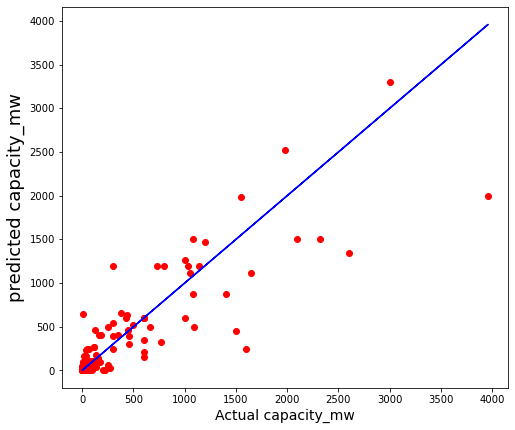

In [129]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

It is better than the linear regression model but or model is that time over fit

# MODEL-->SVR

In [130]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    test_pred=SV.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy -0.1404598069083951 Random_state at 0
Accuracy -0.14971936485203452 Random_state at 1
Accuracy -0.22341954489076743 Random_state at 2
Accuracy -0.186277212281722 Random_state at 3
Accuracy -0.09171897027393627 Random_state at 4
Accuracy -0.1742607932065987 Random_state at 5
Accuracy -0.1021440778299727 Random_state at 6
Accuracy -0.23131495353155773 Random_state at 7
Accuracy -0.14309245922120728 Random_state at 8
Accuracy -0.1949663369730945 Random_state at 9
Accuracy -0.09542067489004702 Random_state at 10
Accuracy -0.11442402588741896 Random_state at 11
Accuracy -0.12989228012444287 Random_state at 12
Accuracy -0.1791454428608663 Random_state at 13
Accuracy -0.1755019727148608 Random_state at 14
Accuracy -0.10507407683964409 Random_state at 15
Accuracy -0.1460109834028842 Random_state at 16
Accuracy -0.14295405392269744 Random_state at 17
Accuracy -0.17562696395305522 Random_state at 18
Accuracy -0.14820005359303035 Random_state at 19
Accuracy -0.22993478724111882 Random_st

At random state 7 model give accuracy -23.86%

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
pred_train=SV.predict(x_train)

MAE_SV=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_SV}")

MSE_SV=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_SV}")

RMSE_SV=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_SV}")

TEST_SCORE_SV=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_SV}")

TRAIN_SCORE_SV=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_SV}")


Mean_Absolute_Error: 320.4078053914397
Mean_Squared_Error: 379793.7873584963
Root_Mean_Absolute_Error: 616.2741170603357
Accuracy_Score of test: -23.131495353155774
Accuracy_Score of train: -14.288039906892646


This model is very bad,it look like terrible

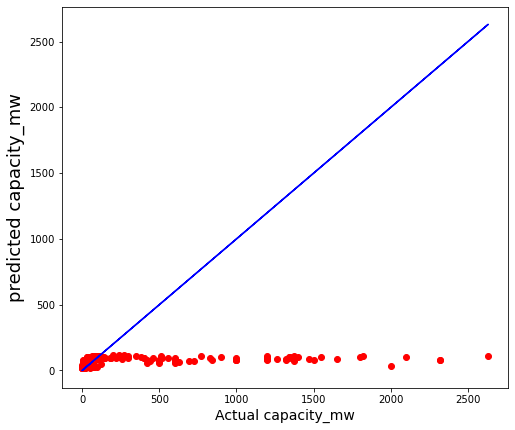

In [132]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

It is very overfit model,so er try another model

# MODEL-->KNEIGHBORS REGRESSOR

In [133]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    test_pred=KN.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.6549672779477613 Random_state at 0
Max accuracy 0.6549672779477613 Max_Random_state 0


Accuracy 0.3177193520743652 Random_state at 1
Accuracy 0.391720971911549 Random_state at 2
Accuracy 0.6321265379015151 Random_state at 3
Accuracy 0.647421264058123 Random_state at 4
Accuracy 0.633965643390455 Random_state at 5
Accuracy 0.6892094889914635 Random_state at 6
Max accuracy 0.6892094889914635 Max_Random_state 6


Accuracy 0.450154495662356 Random_state at 7
Accuracy 0.5228022149805083 Random_state at 8
Accuracy 0.562532732576575 Random_state at 9
Accuracy 0.5343042345066071 Random_state at 10
Accuracy 0.5306050559486386 Random_state at 11
Accuracy 0.16809443884030262 Random_state at 12
Accuracy 0.4477964005233406 Random_state at 13
Accuracy 0.634432659541027 Random_state at 14
Accuracy 0.42390978134835666 Random_state at 15
Accuracy 0.2642104037961577 Random_state at 16
Accuracy 0.30905408064435136 Random_state at 17
Accuracy 0.3271387009938651 Random_state at 18
Accuracy 0.215

At random state 28 model give accuracy score 69.94%

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
pred_train=KN.predict(x_train)

MAE_KN=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_KN}")

MSE_KN=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_KN}")

RMSE_KN=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_KN}")

TEST_SCORE_KN=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_KN}")

TRAIN_SCORE_KN=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_KN}")


Mean_Absolute_Error: 154.1929967032967
Mean_Squared_Error: 133135.93988484418
Root_Mean_Absolute_Error: 364.87797944634065
Accuracy_Score of test: 69.94881791213233
Accuracy_Score of train: 66.81596620059163


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. Accuracy score has come near 69.94%, it is not good so we try another model to find the best model
3. Here in this model we get that our model not look like overfit present in our dataset bcoz test abs train accuracy is not  equal

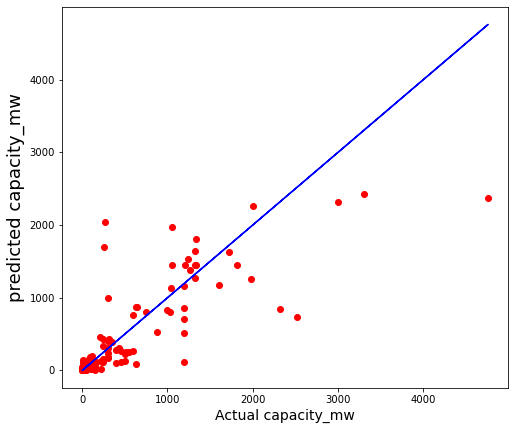

In [135]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

Our model is over fit by null values so we try another model

# MODRL-->ADA BOOST REGRESSOR

In [136]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    test_pred=AD.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.6917059244308044 Random_state at 0
Max accuracy 0.6917059244308044 Max_Random_state 0


Accuracy 0.38388165186929224 Random_state at 1
Accuracy 0.5004450684600024 Random_state at 2
Accuracy 0.5847326956314309 Random_state at 3
Accuracy 0.5379246630352368 Random_state at 4
Accuracy 0.724121923746766 Random_state at 5
Max accuracy 0.724121923746766 Max_Random_state 5


Accuracy 0.5954613410142311 Random_state at 6
Accuracy 0.5646175457134956 Random_state at 7
Accuracy 0.3618369244786739 Random_state at 8
Accuracy 0.6923176733164272 Random_state at 9
Accuracy 0.3765813198491148 Random_state at 10
Accuracy 0.5887702703329385 Random_state at 11
Accuracy 0.5366764528857763 Random_state at 12
Accuracy 0.47300189670337156 Random_state at 13
Accuracy 0.643269287435253 Random_state at 14
Accuracy 0.3679575213047538 Random_state at 15
Accuracy 0.5420999678439417 Random_state at 16
Accuracy 0.5375222324980051 Random_state at 17
Accuracy 0.421322468488586 Random_state at 18
Accuracy 0.54

At random state 5 model give accuracy score 72.21%

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
pred_train=AD.predict(x_train)

MAE_AD=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_AD}")

MSE_AD=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_AD}")

RMSE_AD=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_AD}")

TEST_SCORE_AD=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_AD}")

TRAIN_SCORE_AD=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_AD}")


Mean_Absolute_Error: 295.17854002969614
Mean_Squared_Error: 122421.86964864208
Root_Mean_Absolute_Error: 349.8883674097241
Accuracy_Score of test: 68.70561407701614
Accuracy_Score of train: 69.67365930654663


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 68.70%, which is not good so we try another model to find the best model
3. Here in this model, we get that our model does not look like overfitting present in our dataset bcoz test abs train accuracy is not equal

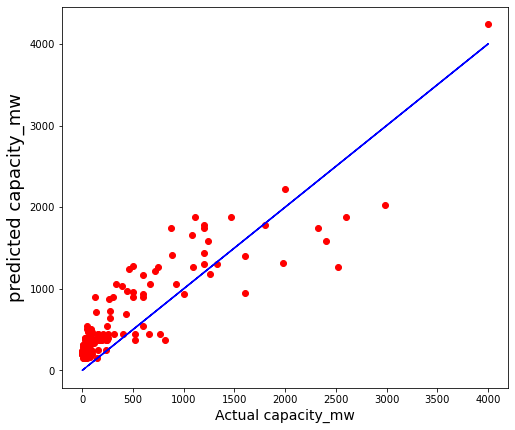

In [138]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# MODEL--><GRADIENT BOOSTING REGRESSOR

In [167]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    GB.fit(x_train,y_train)
    test_pred=GB.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.7686840524155831 Random_state at 0
Max accuracy 0.7686840524155831 Max_Random_state 0


Accuracy 0.6000601209894538 Random_state at 1
Accuracy 0.7321173052782406 Random_state at 2
Accuracy 0.6612986533066418 Random_state at 3
Accuracy 0.7718234995167271 Random_state at 4
Max accuracy 0.7718234995167271 Max_Random_state 4


Accuracy 0.8111268668965067 Random_state at 5
Max accuracy 0.8111268668965067 Max_Random_state 5


Accuracy 0.7511400723389813 Random_state at 6
Accuracy 0.6776239389540835 Random_state at 7
Accuracy 0.6281718792208206 Random_state at 8
Accuracy 0.7771383738695663 Random_state at 9
Accuracy 0.6689529180127254 Random_state at 10
Accuracy 0.7732265193041452 Random_state at 11
Accuracy 0.85923683441017 Random_state at 12
Max accuracy 0.85923683441017 Max_Random_state 12


Accuracy 0.6949020290309755 Random_state at 13
Accuracy 0.7807795459668931 Random_state at 14
Accuracy 0.6663384201422635 Random_state at 15
Accuracy 0.7093398637200664 Random_state at 16
Ac

At random state 12 model give accuracy score 85.92%

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)
GB.fit(x_train,y_train)
pred=GB.predict(x_test)
pred_train=GB.predict(x_train)

MAE_GB=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_GB}")

MSE_GB=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_GB}")

RMSE_GB=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_GB}")

TEST_SCORE_GB=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_GB}")

TRAIN_SCORE_GB=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_GB}")


Mean_Absolute_Error: 104.31468521222136
Mean_Squared_Error: 33342.6649275702
Root_Mean_Absolute_Error: 182.59973967005047
Accuracy_Score of test: 85.72540050177952
Accuracy_Score of train: 92.83379311902173


1. In our dataset large number of null values was present. due to null values error are come is very high.It error less than all prevoius models
2. The accuracy score has come near 85.72%, which is not good so we try another model to find the best model
3. Here in this model, we get that our model does not look like overfitting present in our dataset bcoz test abs train accuracy is not equal


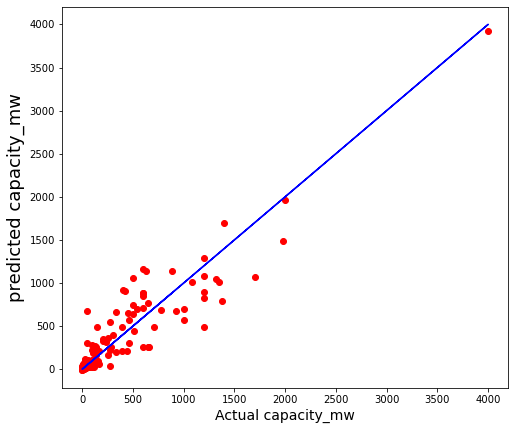

In [141]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

It llok like good and over-fitting is less than all previous model

# MODEL-->RANDOM FOREST REGRESSOR

In [169]:
maxacc=0
maxrand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    test_pred=RF.predict(x_test)
    Accuracy=r2_score(y_test,test_pred)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxacc:
        maxacc=Accuracy
        maxRand=i
        print('Max accuracy',maxacc,'Max_Random_state',i)
        print('\n')    

Accuracy 0.8121366097334604 Random_state at 0
Max accuracy 0.8121366097334604 Max_Random_state 0


Accuracy 0.6728743958746229 Random_state at 1
Accuracy 0.6752803150826451 Random_state at 2
Accuracy 0.7700759193818184 Random_state at 3
Accuracy 0.7752810744496335 Random_state at 4
Accuracy 0.7664895088294386 Random_state at 5
Accuracy 0.7673902490363167 Random_state at 6
Accuracy 0.6454439211442236 Random_state at 7
Accuracy 0.5743103647801832 Random_state at 8
Accuracy 0.7345265623111863 Random_state at 9
Accuracy 0.6910051720366654 Random_state at 10
Accuracy 0.7979718770272164 Random_state at 11
Accuracy 0.8695854226842603 Random_state at 12
Max accuracy 0.8695854226842603 Max_Random_state 12


Accuracy 0.7863657627859137 Random_state at 13
Accuracy 0.7893634217754452 Random_state at 14
Accuracy 0.601873992508259 Random_state at 15
Accuracy 0.7059671651105054 Random_state at 16
Accuracy 0.47533014050848266 Random_state at 17
Accuracy 0.6846182345003677 Random_state at 18
Accuracy 0

At raandom state 12 model give accuracy score 86.95%

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
pred_train=RF.predict(x_train)

MAE_RF=mean_absolute_error(y_test,pred)
print(f"Mean_Absolute_Error: {MAE_RF}")

MSE_RF=mean_squared_error(y_test,pred)
print(f"Mean_Squared_Error: {MSE_RF}")

RMSE_RF=np.sqrt(mean_squared_error(y_test,pred))
print(f"Root_Mean_Absolute_Error: {RMSE_RF}")

TEST_SCORE_RF=r2_score(y_test,pred)*100
print(f"Accuracy_Score of test: {TEST_SCORE_RF}")

TRAIN_SCORE_RF=r2_score(y_train,pred_train)*100
print(f"Accuracy_Score of train: {TRAIN_SCORE_RF}")


Mean_Absolute_Error: 89.3771102197802
Mean_Squared_Error: 29526.003776672624
Root_Mean_Absolute_Error: 171.83132361904399
Accuracy_Score of test: 87.35938235259528
Accuracy_Score of train: 95.42005032228461


1. In our dataset large number of null values was present. due to null values error are come is very high.
2. The accuracy score has come near 87.35%, which is not good so we try another model to find the best model
3. Here in this model, we get that our model does not look like overfitting present in our dataset bcoz test abs train accuracy is not equal

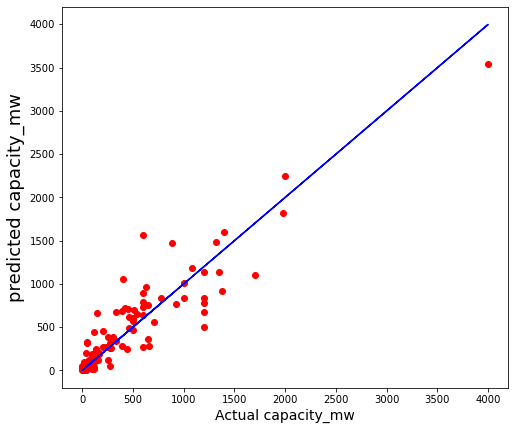

In [144]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

In [171]:
m=[LI,DT,SV,KN,AD,GB,RF]
MODEL=[]
for i in m:
    MODEL.append(i)

MAE=[]
for i in [MAE_LI,MAE_DT,MAE_SV,MAE_KN,MAE_AD,MAE_GB,MAE_RF]:
    MAE.append(i)
    
MSE=[]
for i in [MSE_LI,MSE_DT,MSE_SV,MSE_KN,MSE_AD,MSE_GB,MSE_RF]:
    MSE.append(i)
    
RMSE=[]
for i in [RMSE_LI,RMSE_DT,RMSE_SV,RMSE_KN,RMSE_AD,RMSE_GB,RMSE_RF]:
    RMSE.append(i)
    
ACCURACY=[]
for i in [TEST_SCORE_LI,TEST_SCORE_DT,TEST_SCORE_SV,TEST_SCORE_KN,TEST_SCORE_AD,TEST_SCORE_GB,TEST_SCORE_RF]:
    ACCURACY.append(i)

In [146]:
print(len(MAE),len(MSE),len(RMSE),len(ACCURACY),len(MODEL))

7 7 7 7 7


# TRAIN_TEST_SPLIT MODEL DATAFRAME

In [172]:
TTS=pd.DataFrame({'MODEL':MODEL,'ACCURACY_SCORE':ACCURACY,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
TTS

MODEL  ACCURACY_SCORE  \
0                                 LinearRegression()       28.795921   
1                            DecisionTreeRegressor()       75.596275   
2                                              SVR()      -23.131495   
3                              KNeighborsRegressor()       69.948818   
4  (DecisionTreeRegressor(max_depth=3, random_sta...       68.705614   
5  ([DecisionTreeRegressor(criterion='friedman_ms...       85.725401   
6  (DecisionTreeRegressor(max_features=1.0, rando...       87.359382   

          MAE            MSE        RMSE  
0  266.768342  191131.196382  437.185540  
1  123.368401   80640.846517  283.973320  
2  320.407805  379793.787358  616.274117  
3  154.192997  133135.939885  364.877979  
4  295.178540  122421.869649  349.888367  
5  104.314685   33342.664928  182.599740  
6   89.377110   29526.003777  171.831324

# It is best model have reason-->RANDOM FOREST REGRESSOR
1. Less overfitting than previous models
2. Less error than previous models-->92.71<103.25
3. Hood accuracy score compare to previous mpdel-->86.42 > 85.92

# Try another method for finding best model

# CROSS_VAL_SCORE

In [153]:
test_li=LI.predict(x_test)
accuracy_li=r2_score(y_test,test_li)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(LI,x,y,cv=cv1)
    mean_li=cv_score.mean()
    print(f"At cv {i},mean score is {mean_li} and accuracy score is {accuracy_li}")
    print('\n')

At cv 2,mean score is 0.04342683214274312 and accuracy score is 0.17660281047474347


At cv 3,mean score is 0.10201994074776703 and accuracy score is 0.17660281047474347


At cv 4,mean score is 0.1405521203214903 and accuracy score is 0.17660281047474347


At cv 5,mean score is 0.1660742783767864 and accuracy score is 0.17660281047474347


At cv 6,mean score is 0.15676895796675533 and accuracy score is 0.17660281047474347


At cv 7,mean score is 0.16517248204466006 and accuracy score is 0.17660281047474347


At cv 8,mean score is 0.1674377102126901 and accuracy score is 0.17660281047474347


At cv 9,mean score is 0.16898429545465937 and accuracy score is 0.17660281047474347




At cv=9 model give mean score 16.89%

# CV-->DECISION TREE REGRESSOR

In [154]:
test_dt=DT.predict(x_test)
accuracy_dt=r2_score(y_test,test_dt)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(DT,x,y,cv=cv1)
    mean_dt=cv_score.mean()
    print(f"At cv {i},mean score is {mean_dt} and accuracy score is {accuracy_dt}")
    print('\n')

At cv 2,mean score is 0.23783891052866474 and accuracy score is 0.9849899391648906


At cv 3,mean score is 0.4308988869254393 and accuracy score is 0.9849899391648906


At cv 4,mean score is 0.45224480359220753 and accuracy score is 0.9849899391648906


At cv 5,mean score is 0.5215075930282052 and accuracy score is 0.9849899391648906


At cv 6,mean score is 0.4137968004525341 and accuracy score is 0.9849899391648906


At cv 7,mean score is 0.366054401540937 and accuracy score is 0.9849899391648906


At cv 8,mean score is 0.4542412876146326 and accuracy score is 0.9849899391648906


At cv 9,mean score is 0.4258377710124428 and accuracy score is 0.9849899391648906




At cv=5 model give mean score 51.41%

# CV-->SUPPORT VECTOR REGRESSOR

In [155]:
test_sv=SV.predict(x_test)
accuracy_sv=r2_score(y_test,test_sv)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(SV,x,y,cv=cv1)
    mean_sv=cv_score.mean()
    print(f"At cv {i},mean score is {mean_sv} and accuracy score is {accuracy_sv}")
    print('\n')

At cv 2,mean score is -0.17935105951255503 and accuracy score is -0.1269045123134993


At cv 3,mean score is -0.16842353706198013 and accuracy score is -0.1269045123134993


At cv 4,mean score is -0.16303453992660422 and accuracy score is -0.1269045123134993


At cv 5,mean score is -0.161074099324658 and accuracy score is -0.1269045123134993


At cv 6,mean score is -0.1587150790644174 and accuracy score is -0.1269045123134993


At cv 7,mean score is -0.1633360584483437 and accuracy score is -0.1269045123134993


At cv 8,mean score is -0.1587285065295449 and accuracy score is -0.1269045123134993


At cv 9,mean score is -0.16311184974017237 and accuracy score is -0.1269045123134993




It give very bad mean score at all cv

# CV-->KNEIGHBORS REGRESSOR

In [157]:
test=KN.predict(x_test)
accuracy_kn=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(KN,x,y,cv=cv1)
    mean_kn=cv_score.mean()
    print(f"At cv {i},mean score is {mean_kn} and accuracy score is {accuracy_kn}")
    print('\n')

At cv 2,mean score is 0.42179733788679613 and accuracy score is 0.6501533404019355


At cv 3,mean score is 0.4996838777468418 and accuracy score is 0.6501533404019355


At cv 4,mean score is 0.5111186405664001 and accuracy score is 0.6501533404019355


At cv 5,mean score is 0.5276540386981611 and accuracy score is 0.6501533404019355


At cv 6,mean score is 0.528591195364945 and accuracy score is 0.6501533404019355


At cv 7,mean score is 0.4917829135555677 and accuracy score is 0.6501533404019355


At cv 8,mean score is 0.48818925384682504 and accuracy score is 0.6501533404019355


At cv 9,mean score is 0.5218790237575942 and accuracy score is 0.6501533404019355




At cv=6 model give mean score 52.85%

# CV-->ADA BOOST REGRESSOR

In [158]:
test=AD.predict(x_test)
accuracy_ad=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(AD,x,y,cv=cv1)
    mean_ad=cv_score.mean()
    print(f"At cv {i},mean score is {mean_ad} and accuracy score is {accuracy_ad}")
    print('\n')

At cv 2,mean score is 0.4653935176184025 and accuracy score is 0.5883626007465141


At cv 3,mean score is 0.5119577213685857 and accuracy score is 0.5883626007465141


At cv 4,mean score is 0.5355786718081652 and accuracy score is 0.5883626007465141


At cv 5,mean score is 0.537437456626068 and accuracy score is 0.5883626007465141


At cv 6,mean score is 0.53541325738688 and accuracy score is 0.5883626007465141


At cv 7,mean score is 0.4993529033705281 and accuracy score is 0.5883626007465141


At cv 8,mean score is 0.5339993529489252 and accuracy score is 0.5883626007465141


At cv 9,mean score is 0.5119231511665526 and accuracy score is 0.5883626007465141




At cv=5 model give mean score 53.74%

# CV-->GRADIENT BOOSTING REGRESSOR

In [173]:
test=GB.predict(x_test)
accuracy_gb=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(GB,x,y,cv=i,scoring='r2')
    mean_gb=cv_score.mean()
    print(f"At cv {i},mean score is {mean_gb} and accuracy score is {accuracy_gb}")
    print('\n')

At cv 2,mean score is 0.582196133322515 and accuracy score is 0.8572540050177953


At cv 3,mean score is 0.6597183887033972 and accuracy score is 0.8572540050177953


At cv 4,mean score is 0.6708069412888964 and accuracy score is 0.8572540050177953


At cv 5,mean score is 0.6974400492743024 and accuracy score is 0.8572540050177953


At cv 6,mean score is 0.6918441488440964 and accuracy score is 0.8572540050177953


At cv 7,mean score is 0.623388124964739 and accuracy score is 0.8572540050177953


At cv 8,mean score is 0.6595787821855268 and accuracy score is 0.8572540050177953


At cv 9,mean score is 0.6664772503762956 and accuracy score is 0.8572540050177953




At cv=5 model give mean score 69.74%

# CV-->RANDOM FOREST REGRESSOR

In [174]:
test=RF.predict(x_test)
accuracy_rf=r2_score(y_test,test)

for i in range(2,10):
    cv1=KFold(i)
    cv_score=cross_val_score(RF,x,y,cv=i,scoring='r2')
    mean_rf=cv_score.mean()
    print(f"At cv {i},mean score is {mean_rf} and accuracy score is {accuracy_rf}")
    print('\n')

At cv 2,mean score is 0.599815080446339 and accuracy score is 0.8735938235259527


At cv 3,mean score is 0.6249168823801465 and accuracy score is 0.8735938235259527


At cv 4,mean score is 0.673314504983852 and accuracy score is 0.8735938235259527


At cv 5,mean score is 0.6788655663322105 and accuracy score is 0.8735938235259527


At cv 6,mean score is 0.6912879838941047 and accuracy score is 0.8735938235259527


At cv 7,mean score is 0.6489646359122183 and accuracy score is 0.8735938235259527


At cv 8,mean score is 0.6452938447971669 and accuracy score is 0.8735938235259527


At cv 9,mean score is 0.6805790120300166 and accuracy score is 0.8735938235259527




At cv=6 model give mean score 69.14%

Here in gradiend boosting regressor we get max mean score 69.72% and in random forest regressor we get max mean score 69.12%.
But highest accuracy came into random forest regressor.
In our train test method random forest regressor best model so we go with in cv method with random forest regressor model.

In [175]:
MEAN=[]
for i in [mean_li,mean_dt,mean_sv,mean_kn,mean_ad,mean_gb,mean_rf]:
    MEAN.append(i)
    
ACCURACY=[]
for i in [accuracy_li,accuracy_dt,accuracy_sv,accuracy_kn,accuracy_ad,accuracy_gb,accuracy_rf]:
    ACCURACY.append(i)
    
m=[LI,DT,SV,KN,AD,GB,RF]
MODEL=[]
for i in m:
    MODEL.append(i)

In [176]:
CV=pd.DataFrame({'MODEL':MODEL,'MEAN_SCORE':MEAN,"ACCURACY_SCORE":ACCURACY})
CV

MODEL  MEAN_SCORE  \
0                                 LinearRegression()    0.168984   
1                            DecisionTreeRegressor()    0.425838   
2                                              SVR()   -0.163112   
3                              KNeighborsRegressor()    0.521879   
4  (DecisionTreeRegressor(max_depth=3, random_sta...    0.511923   
5  ([DecisionTreeRegressor(criterion='friedman_ms...    0.666477   
6  (DecisionTreeRegressor(max_features=1.0, rando...    0.680579   

   ACCURACY_SCORE  
0        0.176603  
1        0.984990  
2       -0.126905  
3        0.650153  
4        0.588363  
5        0.857254  
6        0.873594

As we see that rabdom forest regressor have best accuracy so we select RANDOM FOREST REGRESSOR  as a best model

# GRID SEARCH CV-->RANDOM FOREST REGRESSOR

In [178]:
dict1={'criterion':['squared_error','absolute_error','poisson'],'n_estimators':[100,200,300,400,500],'max_depth':[3,4,5,6,7],
      'max_features':['sqrt','log2','None']}

In [179]:
GS=GridSearchCV(RF,dict1,cv=6)
GS.fit(x,y)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [180]:
GS.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}

In [191]:
GS.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=7, max_features='log2')

In [181]:
GS.best_score_

0.7335260324901266

In [182]:
GR=RandomForestRegressor(criterion='poisson',max_features='log2',n_estimators=100,max_depth=7)
GR.fit(x_train,y_train)
print('Mean_absolute_error of model', mean_absolute_error(y_test,RF.predict(x_test)))
print('Mean_square_error of model' , mean_squared_error(y_test,RF.predict(x_test)))
print('Root_mean_square_error of model' ,np.sqrt( mean_squared_error(y_test,RF.predict(x_test))))
print('R2 Score of model', r2_score(y_test,RF.predict(x_test) )*100)

Mean_absolute_error of model 89.3771102197802
Mean_square_error of model 29526.003776672624
Root_mean_square_error of model 171.83132361904399
R2 Score of model 87.35938235259528


Grid Search CV Method give highest accuracy 87.35% of MOdel RANDOM FOREST REGRESSOR

# Hypertuning of RANDMIZED SEARCHCV

In [184]:
RF= RandomizedSearchCV(estimator=RF,param_distributions=dict1,cv=6)

In [185]:
RF.fit(x,y)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [186]:
RF.best_estimator_

RandomForestRegressor(max_depth=7, max_features='sqrt')

In [187]:
RF.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'squared_error'}

In [188]:
RF.best_score_

0.7214415315272164

In [189]:
RF=RandomForestRegressor(criterion='squared_error',max_features='sqrt',n_estimators=100,max_depth=7)
RF.fit(x_train,y_train)
print('Mean_absolute_error of model', mean_absolute_error(y_test,RF.predict(x_test)))
print('Mean_square_error of model' , mean_squared_error(y_test,RF.predict(x_test)))
print('Root_mean_square_error of model' ,np.sqrt( mean_squared_error(y_test,RF.predict(x_test))))
print('R2 Score of model', r2_score(y_test,RF.predict(x_test) )*100)

Mean_absolute_error of model 98.14318966877708
Mean_square_error of model 32162.833880787468
Root_mean_square_error of model 179.33999520683463
R2 Score of model 86.23050756820551


By Random Searchcv five accuracy 86.23%

# SAVE BEST MODEL

In [190]:
import joblib

In [193]:
joblib.dump(GS.best_estimator_,'Power_Plant.pkl')

['Power_Plant.pkl']